In [1]:
import sys; sys.path.append('../../') 

from parsers.parser import *
from utils.data_cleaner import *
from data_collection_config import *

# Получение списка товаров с помощью WB API

In [2]:
api_df = WB_Parser.get_wb_products(query="электроды миостимулятор",pages=WB_PAGES)
api_df.to_csv(f"{RAW_DIRECTORY}{WB_PRODUCTS_FILE}", index=False)
print(f"Собрано {len(api_df)} товаров")

Всего собрано товаров: 125
Собрано 125 товаров


In [4]:
api_df

,id,marketplace,name,price,rating,feedbacks,brand
0,506009344,wb,Электроды для миостимулятора липучки,298.0,4.9,16,
1,114380704,wb,Электроды для миостимулятора,355.0,4.9,955,Миостимулятор
2,80339103,wb,Электроды для миостимулятора,125.0,4.9,993,A-LINE
3,137802648,wb,Электроды для миостимулятора,778.0,4.9,955,Миостимулятор
4,118278610,wb,Электроды для миостимулятора,125.0,4.8,673,A-LINE
...,...,...,...,...,...,...,...
120,148380940,wb,Токопроводящие стельки для массажа ступней,3536.0,4.6,5,Миоток
121,332460693,wb,Электрод медицинский,1693.0,0.0,0,
122,338652841,wb,Электрод медицинский,1241.0,0.0,0,
123,379908115,wb,Наколенник-электрод для электромиостимуляции,5200.0,5.0,1,СТЛ


# Фильтрация данных WB

In [2]:
api_df = pd.read_csv(f"{RAW_DIRECTORY}{WB_PRODUCTS_FILE}")
api_df

,id,marketplace,name,price,rating,feedbacks,brand
0,506009344,wb,Электроды для миостимулятора липучки,298.0,4.9,16,NaN
1,114380704,wb,Электроды для миостимулятора,355.0,4.9,955,Миостимулятор
2,80339103,wb,Электроды для миостимулятора,125.0,4.9,993,A-LINE
3,137802648,wb,Электроды для миостимулятора,778.0,4.9,955,Миостимулятор
4,118278610,wb,Электроды для миостимулятора,125.0,4.8,673,A-LINE
...,...,...,...,...,...,...,...
120,148380940,wb,Токопроводящие стельки для массажа ступней,3536.0,4.6,5,Миоток
121,332460693,wb,Электрод медицинский,1693.0,0.0,0,NaN
122,338652841,wb,Электрод медицинский,1241.0,0.0,0,NaN
123,379908115,wb,Наколенник-электрод для электромиостимуляции,5200.0,5.0,1,СТЛ


In [3]:
clear_df = cleaner_products(
    dirty_df=api_df,
    include_patterns=WB_INCLUDE_PATTERNS,
    exclude_patterns=WB_EXCLUDE_PATTERNS, 
    percent_feedbacks=WB_PERCENT_FEEDBACKS,
    min_feedbacks=WB_MIN_FEEDBACKS,
    min_rating=WB_MIN_RATING,
    price_segment_samples=WB_PRICE_SEGMENT_SAMPLE,
    undervalued_samples=WB_UNDERVALUED_SAMPLE,
    include_top_by_feedbacks=WB_INCLUDE_TOP_BY_FEEDBACKS,
    include_price_segments=WB_INCLUDE_PRICE_SEGMENTS,
    include_undervalued=WB_INCLUDE_UNDERVALUED 

)
# clear_df = api_df
clear_df.to_csv(f"{RAW_DIRECTORY}{WB_CLEARED_PRODUCTS_FILE}", index=False)
clear_df

,id,marketplace,name,price,rating,feedbacks,brand
0,506009344,wb,Электроды для миостимулятора липучки,298.0,4.9,16,NaN
1,114380704,wb,Электроды для миостимулятора,355.0,4.9,955,Миостимулятор
2,80339103,wb,Электроды для миостимулятора,125.0,4.9,993,A-LINE
3,137802648,wb,Электроды для миостимулятора,778.0,4.9,955,Миостимулятор
4,118278610,wb,Электроды для миостимулятора,125.0,4.8,673,A-LINE
...,...,...,...,...,...,...,...
120,148380940,wb,Токопроводящие стельки для массажа ступней,3536.0,4.6,5,Миоток
121,332460693,wb,Электрод медицинский,1693.0,0.0,0,NaN
122,338652841,wb,Электрод медицинский,1241.0,0.0,0,NaN
123,379908115,wb,Наколенник-электрод для электромиостимуляции,5200.0,5.0,1,СТЛ


In [7]:
clear_df = pd.read_csv(f"{RAW_DIRECTORY}{WB_CLEARED_PRODUCTS_FILE}")

In [5]:
clear_df["price"].describe()

count      122.00000
mean      1809.50000
std       3052.72573
min         76.00000
25%        381.50000
50%       1051.00000
75%       1847.00000
max      18335.00000
Name: price, dtype: float64

In [6]:
clear_df

,id,marketplace,name,price,rating,feedbacks,brand
0,506009344,wb,Электроды для миостимулятора липучки,298.0,4.9,16,NaN
1,114380704,wb,Электроды для миостимулятора,355.0,4.9,955,Миостимулятор
2,80339103,wb,Электроды для миостимулятора,125.0,4.9,993,A-LINE
3,137802648,wb,Электроды для миостимулятора,778.0,4.9,955,Миостимулятор
4,118278610,wb,Электроды для миостимулятора,125.0,4.8,673,A-LINE
...,...,...,...,...,...,...,...
117,148380940,wb,Токопроводящие стельки для массажа ступней,3536.0,4.6,5,Миоток
118,332460693,wb,Электрод медицинский,1693.0,0.0,0,NaN
119,338652841,wb,Электрод медицинский,1241.0,0.0,0,NaN
120,379908115,wb,Наколенник-электрод для электромиостимуляции,5200.0,5.0,1,СТЛ


# Получение описания и характеристик товаров WB

In [3]:
write_lock = Lock()

def batch_parse_details(product_ids, description_file, other_specs_file):
    logging.info(f"Инициализация драйвера для группы из {len(product_ids)} артикулов")
    batch_results_main = []
    batch_results_specs = []

    try:
        with WB_Parser() as parser:
            for id in product_ids:
                try:
                    product_data = parser.get_product_details(id)
                    logging.info(f"Успешно получен товар {id}")
                    current_description_df, current_specs_df = parse_product_data_wb(product_data)
                    logging.info(f"Успешно записан товар {id}")
                    if not current_description_df.empty:
                        batch_results_main.append(current_description_df)
                    if not current_specs_df.empty:
                        batch_results_specs.append(current_specs_df)
                    delay = random.uniform(0.5, 1)
                    time.sleep(delay)
                except Exception as e:
                    logging.error(f"Ошибка при обработке {id}: {str(e)}")
            
            if batch_results_main:
                batch_main_df = pd.concat(batch_results_main, ignore_index=True)
                write_lock_df_to_file(description_file, batch_main_df, write_lock)

            if batch_results_specs:  
                batch_specs_df = pd.concat(batch_results_specs, ignore_index=True)
                write_lock_df_to_file(other_specs_file, batch_specs_df, write_lock)
        
    finally:
        logging.info(f"Драйвер для группы завершил работу")

In [4]:
df = pd.read_csv(f"{RAW_DIRECTORY}{WB_CLEARED_PRODUCTS_FILE}")
df_id_total = df["id"].to_list()

df_id = []

DESCRIPTION_FILE = f"{RAW_DIRECTORY}{WB_DESCRIPTION_FILE}"
SPECS_FILE = f"{RAW_DIRECTORY}{WB_OTHER_DETAILS_FILE}"

current_ids = tuple()
if os.path.exists(DESCRIPTION_FILE):
    current_ids = tuple(pd.read_csv(DESCRIPTION_FILE)['id'].to_list())
    for id in df_id_total:
        if id not in current_ids:
            df_id.append(id)
else:
    df_id = df_id_total

# Настройки потоков
NUM_THREADS = 5  # Количество одновременно работающих драйверов
BATCH_SIZE = 15   # Количество артикулов на один драйвер

# Разбиваем артикулы на группы
batches = [df_id[i:i + BATCH_SIZE] for i in range(0, len(df_id), BATCH_SIZE)]
print(f"Всего артикулов: {len(df_id)} | Групп: {len(batches)} | Размер группы: {BATCH_SIZE}")
print(f"Сейчас товаров записано: {len(current_ids)}, будет дозаписано: {len(df_id)}")

Всего артикулов: 122 | Групп: 9 | Размер группы: 15
Сейчас товаров записано: 0, будет дозаписано: 122


#### Проверка работы

In [2]:
with WB_Parser() as parser:
    d = parser.get_product_details(137802648)

d

{'id': 137802648,
 'description': 'Электроды для миостимулятора липучки 4 см x 9 см 8 шт для всех миостимуляторов с креплением под кнопку диаметром 3,5 мм, многоразовые Подходит для миостимуляторов Beurer EM 32, Beurer EM 37, Beurer EM 39, Beurer EM 40, Beurer EM 41, Beurer EM 41.1, Beurer EM 49, Beurer EM 80, Beurer EM 95, Sanitas SEM 40, Sanitas SEM 43, Vupiesse, Bluetens Электроды для миостимуляторов в микротоковой терапии используют для максимального расслабления состояния мышц и улучшения микроциркуляции в коже. Комплект многоразовых самоклеящихся электродов для миостимулятора и массажера — идеальное решение для эффективной и комфортной физиотерапии в домашних условиях. Эти электроды специально разработаны для работы с импульсными аппаратами, обеспечивая точное и интенсивное воздействие на мышцы за счет высокой проводимости, что позволяет передавать электрические импульсы на кожу с максимальной эффективностью. Одно из ключевых преимуществ этих электродов — их способность улучшать 

#### Классический запуск:

In [ ]:
with ThreadPoolExecutor(max_workers=NUM_THREADS) as executor:
    for batch in batches:
        executor.submit(batch_parse_details, batch, DESCRIPTION_FILE, SPECS_FILE)

print(f"\nПарсинг завершен! Результаты сохранены в {DESCRIPTION_FILE}, {SPECS_FILE}")

#### Асинхронный запуск:

In [5]:
import asyncio
import nest_asyncio
from tqdm.notebook import tqdm

nest_asyncio.apply()  # Важно для Jupyter!

async def run_async_parsing():
    pbar = tqdm(total=len(batches), desc="Обработка батчей")
    with ThreadPoolExecutor(max_workers=NUM_THREADS) as executor:
        loop = asyncio.get_running_loop()
        tasks = []

        for batch in batches:
            # Запускаем синхронную функцию в потоке
            task = loop.run_in_executor(
                executor,
                batch_parse_details,
                batch,
                DESCRIPTION_FILE,
                SPECS_FILE
            )
            tasks.append(task)
        
        # Ожидаем завершения всех задач
        # await asyncio.gather(*tasks)
        for future in asyncio.as_completed(tasks):
            await future
            pbar.update(1)  # Обновляем прогресс после каждого завершенного батча
            pbar.set_postfix({"Активных задач": f"{len(tasks) - pbar.n}/{len(tasks)}"})
        
        pbar.close()

# Запуск в фоне
parsing_task = asyncio.create_task(run_async_parsing())
print("Парсинг запущен в фоне!")

Парсинг запущен в фоне!


Обработка батчей:   0%|          | 0/9 [00:00<?, ?it/s]

In [6]:
print("Hello async")

Hello async


In [10]:
decription_df = pd.read_csv(f"{RAW_DIRECTORY}{WB_DESCRIPTION_FILE}")
goods_df = pd.merge(
    clear_df,
    decription_df,
    left_on="id",
    right_on="id",
    how='right'
)
goods_df.head(3)
print(len(goods_df))

122


In [11]:
goods_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           122 non-null    int64  
 1   marketplace  122 non-null    object 
 2   name         122 non-null    object 
 3   price        122 non-null    float64
 4   rating       122 non-null    float64
 5   feedbacks    122 non-null    int64  
 6   brand        107 non-null    object 
 7   description  115 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 7.8+ KB


In [12]:
goods_df

,id,marketplace,name,price,rating,feedbacks,brand,description
0,462063045,wb,Электроды для миостимулятора электрического ма...,899.0,0.0,0,NoName,Электроды для миостимулятора массажера различн...
1,465130901,wb,"Электроды для миостимулятора, липучки",1370.0,0.0,0,NoName,Электроды для миостимулятора массажера. Они сп...
2,114399030,wb,Электрод для массажера,846.0,0.0,0,MyPads,Портативное устройство нового поколения с техн...
3,99869813,wb,Электроды для EM 49 80 95,855.0,5.0,5,BEURER,Дополнительный комплект электродов для Beurer ...
4,419536152,wb,Электроды для миостимулятора,477.0,5.0,1,NaN,Гипоаллергенные гелевые электроды для массажер...
...,...,...,...,...,...,...,...,...
117,355631946,wb,Электроды к миостимулятору импульсному массаже...,1178.0,0.0,0,NoName,Гелевые подушечки для массажера миостимулятора...
118,147644988,wb,Токопроводящие носки для миостимулятора,2732.0,5.0,3,Миоток,"Носки изготовлены из токопроводящей ткани, сос..."
119,148380940,wb,Токопроводящие стельки для массажа ступней,3536.0,4.6,5,Миоток,Низкочастотная импульсная технология для масса...
120,332460693,wb,Электрод медицинский,1693.0,0.0,0,NaN,NaN


In [13]:
goods_df.to_csv(f"{RAW_DIRECTORY}{WB_GOODS_FILE}", index=False)

In [14]:
final_specs_df = pd.read_csv(f"{RAW_DIRECTORY}{WB_OTHER_DETAILS_FILE}")
final_specs_df

,good_id,group_name,name,value
0,462063045,Общие характеристики,Артикул,462063045
1,462063045,Общие характеристики,Комплектация,электроды для массажера миостимулятора - 2 или...
2,462063045,Общие характеристики,Ширина предмета,13 см
3,462063045,Общие характеристики,Высота предмета,14 см
4,462063045,Дополнительная информация,Комплектация,электроды для массажера миостимулятора - 2 или...
...,...,...,...,...
776,148380940,Дополнительная информация,Страна производства,Китай
777,148380940,Дополнительная информация,Комплектация,стельки для массажа
778,148380940,Габариты,Ширина предмета,9 см
779,148380940,Габариты,Высота предмета,26 см


# Парсинг отзывов WB

In [15]:
from threading import Lock
import os
write_lock = Lock()

# Функция для обработки группы артикулов одним драйвером
def process_product_batch(product_ids, output_file):
    logging.info(f"Инициализация драйвера для группы из {len(product_ids)} артикулов")
    batch_results = []
    
    try:
        with WB_Parser() as parser:
            for id in product_ids:
                try:
                    feedback_df = parser.get_product_feedbacks(id)
                    if not feedback_df.empty:
                        batch_results.append(feedback_df)
                    # Пауза между запросами
                    time.sleep(1)
                except Exception as e:
                    logging.error(f"Ошибка при обработке {id}: {str(e)}")
            
            if batch_results:
                batch_df = pd.concat(batch_results, ignore_index=True)
                write_lock_df_to_file(output_file, batch_df, write_lock)
                logging.info(f"Группа из {len(product_ids)} артикулов обработана. Отзывов: {len(batch_df)}")
            else:
                logging.info(f"Группа из {len(product_ids)} артикулов не содержит отзывов")
    finally:
        logging.info(f"Драйвер для группы завершил работу")

In [17]:
df = pd.read_csv(f"{RAW_DIRECTORY}{WB_CLEARED_PRODUCTS_FILE}")
df_id_total = df["id"].to_list()

df_id = []

OUTPUT_FILE = f"{RAW_DIRECTORY}{WB_FEEDBACKS_FILE}"

current_ids = tuple()
if os.path.exists(f"{RAW_DIRECTORY}{OUTPUT_FILE}"):
        current_ids = tuple(pd.read_csv(f"{RAW_DIRECTORY}{OUTPUT_FILE}")['product_id'].unique().tolist())
        for id in df_id_total:
                if id not in current_ids:
                        df_id.append(id)
else:
        df_id = df_id_total

# Настройки потоков
NUM_THREADS = 5  # Количество одновременно работающих драйверов
BATCH_SIZE = 15   # Количество артикулов на один драйвер

# Разбиваем артикулы на группы
batches = [df_id[i:i + BATCH_SIZE] for i in range(0, len(df_id), BATCH_SIZE)]
print(f"Всего артикулов: {len(df_id)} | Групп: {len(batches)} | Размер группы: {BATCH_SIZE}")
print(f"Сейчас товаров записано: {len(current_ids)}, будет дозаписано: {len(df_id)}")

Всего артикулов: 122 | Групп: 9 | Размер группы: 15
Сейчас товаров записано: 0, будет дозаписано: 122


### Проверка работы

In [18]:
with WB_Parser() as parser:
    d = parser.get_product_feedbacks(137802648)

d

,good_id,marketplace,rating,text
0,137802648,wb,5,Очень хорошие электроды . Беру второй раз. Хва...
1,137802648,wb,5,"Достоинства:Широкие удобные, после 10-12 цикло..."
2,137802648,wb,5,"Достоинства:Хорошие, качественные электроды. Р..."
3,137802648,wb,5,"Достоинства:очень клейкие,мне понравились\nКом..."
4,137802648,wb,5,Всё отлично. Благодарю
5,137802648,wb,3,None
6,137802648,wb,5,Для аппарата Vuppiess подходят. Всё работает.
7,137802648,wb,1,"Отказ, так как не подходит клепками для модели..."
8,137802648,wb,5,👍👍👍👍👍
9,137802648,wb,1,Второй оаз прислали не то


#### Классический запуск:

In [ ]:
# Запускаем обработку группами
with ThreadPoolExecutor(max_workers=NUM_THREADS) as executor:
    for batch in batches:
        executor.submit(process_product_batch, batch, OUTPUT_FILE)

logging.info(f"Парсинг завершен! Результаты сохранены в {OUTPUT_FILE}")
print("Парсинг завершен! Результаты сохранены в", OUTPUT_FILE)

Парсинг завершен! Результаты сохранены в all_feedbacks.csv


#### Асинхронный запуск:

In [19]:
import asyncio
import nest_asyncio
from tqdm.notebook import tqdm

nest_asyncio.apply()

async def run_async_parsing():
    pbar = tqdm(total=len(batches), desc="Обработка батчей")
    with ThreadPoolExecutor(max_workers=NUM_THREADS) as executor:
        loop = asyncio.get_running_loop()
        tasks = []

        for batch in batches:
            # Запускаем синхронную функцию в потоке
            task = loop.run_in_executor(
                executor,
                process_product_batch,
                batch,
                OUTPUT_FILE
            )
            tasks.append(task)
        
        # Ожидаем завершения всех задач
        # await asyncio.gather(*tasks)
        for future in asyncio.as_completed(tasks):
            await future
            pbar.update(1)  # Обновляем прогресс после каждого завершенного батча
            pbar.set_postfix({"Активных задач": f"{len(tasks) - pbar.n}/{len(tasks)}"})
        
        pbar.close()

# Запуск в фоне
parsing_task = asyncio.create_task(run_async_parsing())
print("Парсинг запущен в фоне!")

Парсинг запущен в фоне!


Обработка батчей:   0%|          | 0/9 [00:00<?, ?it/s]

In [21]:
feedbacks = pd.read_csv(f"{RAW_DIRECTORY}{WB_FEEDBACKS_FILE}")

feedbacks.head()
len(feedbacks['good_id'].unique())

70

Итоговое количество товаров с отзывами 70, тк не для всех вариантов товара есть отзывы с текстом

In [24]:
clear_df[~clear_df["id"].isin(feedbacks["good_id"].unique())]

len(feedbacks["good_id"].unique())


70

In [25]:
len(feedbacks)

2297

# Получение данных Ozon

### Асинхронный режим запуска

In [ ]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

def parse_ozon_products(output_file):
    with Ozon_Parser() as parser:
        links_df = parser.get_products_links()
    links_df.to_csv(output_file, index=False)

async def run_async_parsing():

    loop = asyncio.get_running_loop()
    
    await loop.run_in_executor(
        None,
        parse_ozon_products,
        OZON_PRODUCTS_FILE
    )


parsing_task = asyncio.create_task(run_async_parsing())
print("Парсинг запущен в фоне!")


Парсинг запущен в фоне!


In [ ]:
if parsing_task.done():
    print("Парсинг завершен")
else:
    print("Парсинг еще в процессе")

Парсинг завершен


### Классический запуск

In [28]:
query = 'электроды для миостимулятора'
max_products = OZON_PAGES
OUTPUT_FILE = f"{RAW_DIRECTORY}{OZON_PRODUCTS_FILE}"

with Ozon_Parser() as parser:
     links_df = parser.get_products_links(query=query, max_products=max_products)

links_df.to_csv(OUTPUT_FILE, index=False)
links_df
# ps aux | grep -i "chrome\|chromedriver" | grep -v grep | awk '{print $2}' | xargs kill -9

,link,marketplace,name,price,rating,feedbacks
0,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,Электроды для миостимулятора АУЗТ Дельта Комби...,366 ₽,4.9,257
1,https://www.ozon.ru/product/shuboshi-elektrody...,ozon,SHUBOSHI Электроды для миостимулятора массажер...,593 ₽,4.9,964
2,https://www.ozon.ru/product/shuboshi-elektrody...,ozon,SHUBOSHI Электроды для миостимулятора массажер...,399 ₽,4.9,964
3,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,"Электроды для миостимулятора, липучки для элек...",360 ₽,4.9,4159
4,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,"Электроды для миостимулятора, липучки для элек...",250 ₽,4.9,4159
...,...,...,...,...,...,...
1889,https://www.ozon.ru/product/planta-massazher-m...,ozon,"PLANTA Массажер - миостимулятор EMS-750, 3 эле...",15 938 ₽,0,0
1890,https://www.ozon.ru/product/massazher-miostimu...,ozon,"Массажер - миостимулятор -750, 4 электрода, та...",23 974 ₽,0,0
1891,https://www.ozon.ru/product/miostimulyator-imp...,ozon,Миостимулятор импульсный массажер электрически...,58 671 ₽,0,0
1892,https://www.ozon.ru/product/miostimulyator-imp...,ozon,Миостимулятор импульсный массажер электрически...,58 671 ₽,0,0


# Фильтрация данных Ozon

### Подготовка df

In [2]:
ozon_df = pd.read_csv(f"{RAW_DIRECTORY}{OZON_PRODUCTS_FILE}")

ozon_df = ozon_df.rename(columns={
    "title": "name",
    "reviews": "feedbacks"
})

ozon_df['feedbacks'] = ozon_df['feedbacks'].fillna(0).astype(int)
ozon_df['rating'] = (
    ozon_df['rating']
    .str.replace(',', '.')  # Заменяем запятые на точки для десятичных
    .str.extract(r'(\d+\.?\d*)', expand=False)  # Извлекаем числа с точкой
    .fillna(0)              # Заменяем пропуски на 0
    .astype(float)          # Преобразуем в float
)

all_rubles = ozon_df['price'].str.contains('₽', na=False).all()

if all_rubles:
    print("Все цены указаны в рублях (₽).")
    
    # Очистка и преобразование в int
    ozon_df['price'] = ozon_df['price'].str.replace(r'[^\d]', '', regex=True).astype(int)
    
    # Проверка на NaN
    if ozon_df['price'].isna().any():
        print("После очистки обнаружены пропущенные значения (NaN).")
    else:
        print("Пропущенных значений нет.")
        
    print("\nРезультат:")
    # print(ozon_df.head())
else:
    print("Найдены цены не в рублях. Строки без ₽:")
    print(ozon_df[~ozon_df['price'].str.contains('₽', na=False)])

# ozon_df.to_csv("../data/full_ozon_products.csv", index=False)

ozon_df

Все цены указаны в рублях (₽).
Пропущенных значений нет.

Результат:


,link,marketplace,name,price,rating,feedbacks
0,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,Электроды для миостимулятора АУЗТ Дельта Комби...,366,4.9,257
1,https://www.ozon.ru/product/shuboshi-elektrody...,ozon,SHUBOSHI Электроды для миостимулятора массажер...,593,4.9,964
2,https://www.ozon.ru/product/shuboshi-elektrody...,ozon,SHUBOSHI Электроды для миостимулятора массажер...,399,4.9,964
3,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,"Электроды для миостимулятора, липучки для элек...",360,4.9,4159
4,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,"Электроды для миостимулятора, липучки для элек...",250,4.9,4159
...,...,...,...,...,...,...
1889,https://www.ozon.ru/product/planta-massazher-m...,ozon,"PLANTA Массажер - миостимулятор EMS-750, 3 эле...",15938,0.0,0
1890,https://www.ozon.ru/product/massazher-miostimu...,ozon,"Массажер - миостимулятор -750, 4 электрода, та...",23974,0.0,0
1891,https://www.ozon.ru/product/miostimulyator-imp...,ozon,Миостимулятор импульсный массажер электрически...,58671,0.0,0
1892,https://www.ozon.ru/product/miostimulyator-imp...,ozon,Миостимулятор импульсный массажер электрически...,58671,0.0,0


In [3]:
ozon_df.dtypes

link            object
marketplace     object
name            object
price            int64
rating         float64
feedbacks        int64
dtype: object

### Очистка

In [4]:
clear_ozon_df = cleaner_products(
    dirty_df=ozon_df, 
    id_col='link',
    include_patterns=OZON_INCLUDE_PATTERNS,
    exclude_patterns=OZON_EXCLUDE_PATTERNS, 
    percent_feedbacks=OZON_PERCENT_FEEDBACKS,
    min_feedbacks=OZON_MIN_FEEDBACKS,
    min_rating=OZON_MIN_RATING,
    price_segment_samples=OZON_PRICE_SEGMENT_SAMPLE,
    undervalued_samples=OZON_UNDERVALUED_SAMPLE,
    include_top_by_feedbacks=OZON_INCLUDE_TOP_BY_FEEDBACKS,
    include_price_segments=OZON_INCLUDE_PRICE_SEGMENTS,
    include_undervalued=OZON_INCLUDE_UNDERVALUED 
)

# clear_ozon_df.to_csv(f"{RAW_DIRECTORY}{OZON_CLEARED_PRODUCTS_FILE}", index=False)
clear_ozon_df

,link,marketplace,name,price,rating,feedbacks
0,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,Электроды для миостимулятора АУЗТ Дельта Комби...,366,4.9,257
1,https://www.ozon.ru/product/shuboshi-elektrody...,ozon,SHUBOSHI Электроды для миостимулятора массажер...,593,4.9,964
2,https://www.ozon.ru/product/shuboshi-elektrody...,ozon,SHUBOSHI Электроды для миостимулятора массажер...,399,4.9,964
3,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,"Электроды для миостимулятора, липучки для элек...",360,4.9,4159
4,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,"Электроды для миостимулятора, липучки для элек...",250,4.9,4159
...,...,...,...,...,...,...
1619,https://www.ozon.ru/product/elektrostimulyator...,ozon,Электростимулятор для мышц 4-8 электродов 8 ре...,969,5.0,1
1670,https://www.ozon.ru/product/elektricheskiy-mio...,ozon,"Электрический миостимулятор TENS/EMS, аппарат ...",3922,4.9,40
1727,https://www.ozon.ru/product/miostimulyator-imp...,ozon,Миостимулятор импульсный массажер электрически...,1032,1.0,1
1798,https://www.ozon.ru/product/elektrody-dlya-mio...,ozon,Электроды для миостимулятора массажера со шнур...,792,4.8,2907


In [15]:
# Дополнительная очистка после основной фильтрации
def additional_cleaning(df):
    """
    Дополнительная очистка данных от нерелевантных товаров
    которые прошли через основную фильтрацию
    """
    cleaned_df = df.copy()
    
    # Паттерны для жесткого исключения (даже если есть "электрод")
    hard_exclude_patterns = [
        r"^миостимулятор\b",
        r"^массажер\b", 
        r"^тренажер\b",
        r"^аппарат\b",
        r"^прибор\b",
        r"^устройство\b",
        r"^стимулятор\b",
        r"^электростимулятор\b",
        r"^шапочка\b",
        r"^6-канальный электроакупунктурный стимулятор\b",
        
        r"миостимулятор.*с.*электрод",
        r"массажер.*с.*электрод",
        r"тренажер.*с.*электрод",
        r"аппарат.*с.*электрод",
        r"прибор.*с.*электрод",
        
        r"платформа.*электрод",
        r"ems.*платформа",
        r"пояс.*миостимулятор",
        r"вибропояс",
        
        r"тапочки.*миостимулятор",
        r"перчатки.*миостимулятор", 
        r"носок.*миостимулятор",
    ]
    
    def is_hard_exclude(name, price):
        name_lower = name.lower()
        
        for pattern in hard_exclude_patterns:
            if re.search(pattern, name_lower):
                return True
            
        return False
    
    mask = cleaned_df.apply(
        lambda row: not is_hard_exclude(row['name'], row['price']), 
        axis=1
    )
    
    cleaned_df = cleaned_df[mask]
    
    cleaned_df = cleaned_df.drop_duplicates(subset=['link'])
    
    print(f"После дополнительной очистки: {len(cleaned_df)} товаров (было {len(df)})")
    
    return cleaned_df

# Применяем дополнительную очистку
final_ozon_df = additional_cleaning(clear_ozon_df)

# Сохраняем окончательный результат
final_ozon_df.to_csv(f"{RAW_DIRECTORY}{OZON_CLEARED_PRODUCTS_FILE}", index=False)

print(f"Финальный результат сохранен: {len(final_ozon_df)} товаров")

После дополнительной очистки: 350 товаров (было 438)
Финальный результат сохранен: 350 товаров


# Получение описания и характеристик товаров Ozon

In [6]:
ozon_df = pd.read_csv(f"{RAW_DIRECTORY}{OZON_CLEARED_PRODUCTS_FILE}")

ozon_links = ozon_df['link'].to_list()

DESCRIPTION_FILE = f"{RAW_DIRECTORY}{OZON_DESCRIPTION_FILE}"
SPECS_FILE = f"{RAW_DIRECTORY}{OZON_OTHER_DETAILS_FILE}"

for f in [DESCRIPTION_FILE, SPECS_FILE]:
    if os.path.exists(f):
        os.remove(f)
        

### Проверка работы

In [2]:
with Ozon_Parser() as parser:
    ozon_details = parser.get_products_details("https://www.ozon.ru/product/shuboshi-elektrody-dlya-miostimulyatora-massazhera-samokleyashchiesya-gelevye-nakladki-lipuchki-1209345498/?at=GRt2k30Dxsk6mgLhmYqLZxF2WZ86EtWznVz2iBV9Olw")

ozon_details

{'link': 'https://www.ozon.ru/product/shuboshi-elektrody-dlya-miostimulyatora-massazhera-samokleyashchiesya-gelevye-nakladki-lipuchki-1209345498/?at=GRt2k30Dxsk6mgLhmYqLZxF2WZ86EtWznVz2iBV9Olw',
 'id': 1209345498,
 'description': 'Способ применения\nПрисоединить электроды к прибору для миостимуляции, снять защитную пленку и приклеить электроды к коже. Далее следовать инструкции к вашему прибору. Срок использования электродов зависит от жирности кожи и волосяного покрова. Для увеличения срока службы электродов кожу рекомендуется обрабатывать спиртовым раствором или протереть влажной салфеткой.\nСпособ применения\nПрисоединить электроды к прибору для миостимуляции, снять защитную пленку и приклеить электроды к коже. Далее следовать инструкции к вашему прибору. Срок использования электродов зависит от жирности кожи и волосяного покрова. Для увеличения срока службы электродов кожу рекомендуется обрабатывать спиртовым раствором или протереть влажной салфеткой.',
 'brand': 'SHUBOSHI',
 'spec

In [7]:
write_lock = Lock()
with Ozon_Parser() as parser:
    for link in ozon_links:
        ozon_details = parser.get_products_details(link)
        main_details, other_specs = parse_product_data_ozon(ozon_details)

        write_lock_df_to_file(DESCRIPTION_FILE, main_details, write_lock)
        write_lock_df_to_file(SPECS_FILE, other_specs, write_lock)

main_details = pd.read_csv(DESCRIPTION_FILE)
main_details = main_details[main_details['id'].notna()]
main_details['id'] = main_details['id'].astype(int)
main_details.to_csv(DESCRIPTION_FILE, index=False)


In [8]:
main_details = pd.read_csv(f"{RAW_DIRECTORY}{OZON_DESCRIPTION_FILE}")
other_specs = pd.read_csv(f"{RAW_DIRECTORY}{OZON_OTHER_DETAILS_FILE}")

In [15]:
ozon_products_df = pd.read_csv(f"{RAW_DIRECTORY}{OZON_CLEARED_PRODUCTS_FILE}")
ozon_goods_df = pd.merge(
    main_details,
    ozon_products_df,
    left_on="link",
    right_on="link",
    how='left'
)

column_order = ['id', 'marketplace', 'name', 'price', 'rating', 'feedbacks', 'brand', 'description']
ozon_goods_df = ozon_goods_df.reindex(columns=column_order)

ozon_goods_df.to_csv(f"{RAW_DIRECTORY}{OZON_GOODS_FILE}", index=False)
print(len(ozon_goods_df))
ozon_goods_df.head(5)

350


,id,marketplace,name,price,rating,feedbacks,brand,description
0,2634695134,ozon,Электроды для миостимулятора АУЗТ Дельта Комби...,366,4.9,257,Миостимулятор,Способ применения\nАккуратно удалите защитный ...
1,1209345498,ozon,SHUBOSHI Электроды для миостимулятора массажер...,593,4.9,964,SHUBOSHI,Способ применения\nПрисоединить электроды к пр...
2,1126167087,ozon,SHUBOSHI Электроды для миостимулятора массажер...,399,4.9,964,SHUBOSHI,Способ применения\nПрисоединить электроды к пр...
3,2839516740,ozon,"Электроды для миостимулятора, липучки для элек...",360,4.9,4159,AllerShop,"Способ применения\nКрепление типа ""Кнопки"" кре..."
4,2839516708,ozon,"Электроды для миостимулятора, липучки для элек...",250,4.9,4159,AllerShop,"Способ применения\nКрепление типа ""Кнопки"" кре..."


# Парсинг отзывов Ozon

Есть проблемы: 
- Чтобы получить полные отзывы о товаре, предварительно необходимо авторизоваться вручную 
- Из первого недостатка вытекает невозможность запустить парсинг отзывов полностью в автоматическом режиме в контекстном менеджере
- Автоматически запустить можно, но тогда на каждый товар будет получено не более 100 отзывов

In [9]:
ozon_df = pd.read_csv(f'{RAW_DIRECTORY}{OZON_GOODS_FILE}')

product_ids = ozon_df['id'].to_list()

FEEDBACKS_FILE = f"{RAW_DIRECTORY}{OZON_FEEDBACKS_FILE}"

for f in [FEEDBACKS_FILE]:
    if os.path.exists(f):
        os.remove(f)

len(product_ids)

350

In [3]:
parser = Ozon_Parser()

In [6]:
# Используй для авторизации
# 1099137205
# 2059797161
# product_feedbacks = parser.get_product_feedbacks('2634695096', max_product_feedbacks=100)
product_feedbacks = parser.get_product_feedbacks('1917747060', max_product_feedbacks=10)

In [10]:
write_lock = Lock()

for id in product_ids:
    product_feedbacks = parser.get_product_feedbacks(id)
    write_lock_df_to_file(FEEDBACKS_FILE, product_feedbacks, write_lock)

ozon_feedbacks = pd.read_csv(FEEDBACKS_FILE)

In [12]:
len(ozon_feedbacks.groupby(by='good_id'))


346

In [13]:
parser.safe_close()

# Объединение данных

### Общая структура

In [14]:
Goods = pd.DataFrame(
    columns=[
        'id', 
        'marketplace', 
        'name', 
        'price',
        'rating', 
        'feedbacks', 
        'brand', 
        'description'
    ]
)

Other_characteristicks = pd.DataFrame(
    columns=[
        'id', 
        'marketplace', 
        'good_id',
        'name', 
        'value'
    ]
)

Feedbacks = pd.DataFrame(
    columns=[
        'id', 
        'good_id', 
        'rating',
        'advantage', 
        'disadvantage',
        'comment'
    ]
)

### Создание таблицы Goods

In [15]:
wb_goods = pd.read_csv(f'{RAW_DIRECTORY}{WB_GOODS_FILE}')
ozon_goods = pd.read_csv(f'{RAW_DIRECTORY}{OZON_GOODS_FILE}')

ozon_goods.head(3)

,id,marketplace,name,price,rating,feedbacks,brand,description
0,2634695134,ozon,Электроды для миостимулятора АУЗТ Дельта Комби...,366,4.9,257,Миостимулятор,Способ применения\nАккуратно удалите защитный ...
1,1209345498,ozon,SHUBOSHI Электроды для миостимулятора массажер...,593,4.9,964,SHUBOSHI,Способ применения\nПрисоединить электроды к пр...
2,1126167087,ozon,SHUBOSHI Электроды для миостимулятора массажер...,399,4.9,964,SHUBOSHI,Способ применения\nПрисоединить электроды к пр...


In [19]:
wb_goods.head(3)

,id,marketplace,name,price,rating,feedbacks,brand,description
0,462063045,wb,Электроды для миостимулятора электрического ма...,899.0,0.0,0,NoName,Электроды для миостимулятора массажера различн...
1,465130901,wb,"Электроды для миостимулятора, липучки",1370.0,0.0,0,NoName,Электроды для миостимулятора массажера. Они сп...
2,114399030,wb,Электрод для массажера,846.0,0.0,0,MyPads,Портативное устройство нового поколения с техн...


In [20]:
Goods = pd.concat([wb_goods, ozon_goods], ignore_index=True)

Goods['id'] = Goods['id'].astype(int)
Goods['price'] = Goods['price'].astype(int)

Goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           472 non-null    int64  
 1   marketplace  472 non-null    object 
 2   name         472 non-null    object 
 3   price        472 non-null    int64  
 4   rating       472 non-null    float64
 5   feedbacks    472 non-null    int64  
 6   brand        457 non-null    object 
 7   description  427 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 29.6+ KB


### Создание таблицы Other_characteristics

In [23]:
wb_other_characteristics = pd.read_csv(f'{RAW_DIRECTORY}{WB_OTHER_DETAILS_FILE}')
wb_other_characteristics['marketplace'] = 'wb'
ozon_other_characteristics = pd.read_csv(f'{RAW_DIRECTORY}{OZON_OTHER_DETAILS_FILE}')
ozon_other_characteristics['marketplace'] = 'ozon'

wb_other_characteristics = wb_other_characteristics.drop(columns='group_name')
wb_other_characteristics

,good_id,name,value,marketplace
0,462063045,Артикул,462063045,wb
1,462063045,Комплектация,электроды для массажера миостимулятора - 2 или...,wb
2,462063045,Ширина предмета,13 см,wb
3,462063045,Высота предмета,14 см,wb
4,462063045,Комплектация,электроды для массажера миостимулятора - 2 или...,wb
...,...,...,...,...
776,148380940,Страна производства,Китай,wb
777,148380940,Комплектация,стельки для массажа,wb
778,148380940,Ширина предмета,9 см,wb
779,148380940,Высота предмета,26 см,wb


In [24]:
ozon_other_characteristics

,good_id,name,value,marketplace
0,2634695134,Артикул,2634695134,ozon
1,2634695134,Тип,Комплектующие для косметологических аппаратов,ozon
2,2634695134,Цвет,Белый,ozon
3,2634695134,Вид комплектующего,для миостимуляторов,ozon
4,2634695134,Вид аппаратной процедуры,"Микротоки, Миостимуляция",ozon
...,...,...,...,...
3279,1331348894,"Фактический размер товара, см",16*16,ozon
3280,1331348894,Упаковка,Пластиковый пакет,ozon
3281,1331348894,Страна-изготовитель,Китай,ozon
3282,1331348894,Вид массажа\n,"Акупрессурный, Антицеллюлитный, Импульсный, Ле...",ozon


In [25]:
Other_characteristicks = pd.concat([wb_other_characteristics, ozon_other_characteristics], ignore_index=True)
marketplace_col = Other_characteristicks.pop('marketplace')
Other_characteristicks.insert(1, 'marketplace', marketplace_col)

Other_characteristicks

,good_id,marketplace,name,value
0,462063045,wb,Артикул,462063045
1,462063045,wb,Комплектация,электроды для массажера миостимулятора - 2 или...
2,462063045,wb,Ширина предмета,13 см
3,462063045,wb,Высота предмета,14 см
4,462063045,wb,Комплектация,электроды для массажера миостимулятора - 2 или...
...,...,...,...,...
4060,1331348894,ozon,"Фактический размер товара, см",16*16
4061,1331348894,ozon,Упаковка,Пластиковый пакет
4062,1331348894,ozon,Страна-изготовитель,Китай
4063,1331348894,ozon,Вид массажа\n,"Акупрессурный, Антицеллюлитный, Импульсный, Ле..."


### Создание таблицы Feedbacks

In [26]:
ozon_feedbacks_df = pd.read_csv(f'{RAW_DIRECTORY}{WB_FEEDBACKS_FILE}')
wb_feedbacks_df = pd.read_csv(f'{RAW_DIRECTORY}{OZON_FEEDBACKS_FILE}')

ozon_feedbacks_df.info()
wb_feedbacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   good_id      2297 non-null   int64 
 1   marketplace  2297 non-null   object
 2   rating       2297 non-null   int64 
 3   text         2111 non-null   object
dtypes: int64(2), object(2)
memory usage: 71.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23402 entries, 0 to 23401
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   good_id      23402 non-null  int64 
 1   marketplace  23402 non-null  object
 2   rating       23402 non-null  int64 
 3   text         12222 non-null  object
dtypes: int64(2), object(2)
memory usage: 731.4+ KB


In [27]:
ozon_feedbacks_df

,good_id,marketplace,rating,text
0,99869813,wb,5,Хорошие электроды\nПервоначальный отзыв
1,99869813,wb,5,Все соответствует описанию! Работают отлично.
2,75784947,wb,5,"Все пришло, комплект хороший на все части тела..."
3,261900502,wb,1,NaN
4,205935013,wb,5,Самые лучшие из всех мною опробованных. Выреза...
...,...,...,...,...
2292,147676891,wb,5,Достоинства:Не плохо в массаже
2293,147676891,wb,1,Они не рабоиают! Как мне сделать замену товара?
2294,147660598,wb,1,Непомерно дорого
2295,148380940,wb,5,"Достоинства:Очень хорошо снимают усталость, от..."


In [28]:
wb_feedbacks_df

,good_id,marketplace,rating,text
0,2634695134,ozon,5,"Быстрая доставка, подошли к аппарату Меркурий,..."
1,2634695134,ozon,5,"все отлично нет Пришёл товар быстро, даже рань..."
2,2634695134,ozon,5,подошли к аппарату Меркурий нет от родных элек...
3,2634695134,ozon,5,Работают нет Дополнительные электроды к набору
4,2634695134,ozon,5,"заказываю во второй раз, понравилось,дана подр..."
...,...,...,...,...
23397,1331348894,ozon,5,товар хороший качественный
23398,1331348894,ozon,4,"нормально, проводки тонкие"
23399,1331348894,ozon,5,Хороший гель.Ток проводит.
23400,1331348894,ozon,5,хороший качественный шнур


In [29]:
Feedbacks = pd.concat([wb_feedbacks_df, ozon_feedbacks_df], ignore_index=True)

Feedbacks

,good_id,marketplace,rating,text
0,2634695134,ozon,5,"Быстрая доставка, подошли к аппарату Меркурий,..."
1,2634695134,ozon,5,"все отлично нет Пришёл товар быстро, даже рань..."
2,2634695134,ozon,5,подошли к аппарату Меркурий нет от родных элек...
3,2634695134,ozon,5,Работают нет Дополнительные электроды к набору
4,2634695134,ozon,5,"заказываю во второй раз, понравилось,дана подр..."
...,...,...,...,...
25694,147676891,wb,5,Достоинства:Не плохо в массаже
25695,147676891,wb,1,Они не рабоиают! Как мне сделать замену товара?
25696,147660598,wb,1,Непомерно дорого
25697,148380940,wb,5,"Достоинства:Очень хорошо снимают усталость, от..."


### Запись всех данных

In [ ]:
Goods.to_csv(f'{CLEAR_DIRECTORY}{CLEAR_GOODS_FILE}', index=False)
Other_characteristicks.to_csv(f'{CLEAR_DIRECTORY}{CLEAR_OTHER_CHARACTERISTICKS_FILE}', index=False)
Feedbacks.to_csv(f'{CLEAR_DIRECTORY}{CLEAR_FEEDBACKS_FILE}', index=False)

# Анализ данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Чтение данных

In [ ]:
Goods = pd.read_csv(f'{CLEAR_DIRECTORY}{GOODS_FILE}')
Other_characteristicks = pd.read_csv(f'{CLEAR_DIRECTORY}{OTHER_CHARACTERISTICKS_FILE}')
Feedbacks = pd.read_csv(f'{CLEAR_DIRECTORY}{FEEDBACKS_FILE}')

Goods.info()
Other_characteristicks.info()
Feedbacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1356 non-null   int64  
 1   marketplace  1356 non-null   object 
 2   name         1356 non-null   object 
 3   price        1356 non-null   int64  
 4   rating       1356 non-null   float64
 5   feedbacks    1356 non-null   int64  
 6   brand        1276 non-null   object 
 7   power_type   992 non-null    object 
 8   zones        1217 non-null   object 
 9   type         1035 non-null   object 
 10  description  1232 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 116.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   good_id      19959 non-null  int64 
 1   marketplace  19959 non-null  object
 2   name  

In [ ]:
def prepare_goods(df):
    df['brand'] = df['brand'].fillna('Unknown')
    df['power_type'] = df['power_type'].fillna('not_specified')
    df['zones'] = df['zones'].fillna('not_specified')
    df['type'] = df['type'].fillna('not_specified')
    df['description'] = df['description'].fillna('')
    
    df['brand'] = df['brand'].str.lower().str.strip()
    df['power_type'] = df['power_type'].str.lower()
    df['zones'] = df['zones'].str.lower()
    df['type'] = df['type'].str.lower()

    mask = df['name'].apply(is_relevant)
    df = df[mask].copy()
    
    return df

def prepare_other_chars(df):
    df['name'] = df['name'].str.lower().str.strip()
    df['value'] = df['value'].str.lower().str.strip()
    
    df = df[df['value'].notna() & (df['value'] != '')]
    
    return df

def prepare_feedbacks(df):
    df['advantage'] = df['advantage'].fillna('')
    df['disadvantage'] = df['disadvantage'].fillna('')
    df['comment'] = df['comment'].fillna('')

    df['full_text'] = df['advantage'] + ' ' + df['disadvantage'] + ' ' + df['comment']
    
    df['full_text'] = df['full_text'].str.lower().str.strip()
    
    return df

# Применение функций подготовки
Goods = prepare_goods(Goods)
# Goods = Goods[(Goods['price'] >= Goods['price'].quantile(0.01)) & (Goods['price'] <= Goods['price'].quantile(0.95))]
Other_characteristicks = prepare_other_chars(Other_characteristicks)
Feedbacks = prepare_feedbacks(Feedbacks)

# # 4. Создание сводной таблицы характеристик
# chars_pivot = Other_characteristicks.pivot_table(
#     index='good_id',
#     columns='name',
#     values='value',
#     aggfunc='first'
# ).reset_index()

# # 5. Объединение таблиц
# final_df = pd.merge(
#     Goods,
#     chars_pivot,
#     left_on='id',
#     right_on='good_id',
#     how='left'
# )

# # 6. Агрегация отзывов
# feedback_stats = Feedbacks.groupby('product_id').agg({
#     'rating': ['mean', 'count'],
#     'full_text': 'count'
# }).reset_index()
# feedback_stats.columns = ['product_id', 'avg_rating', 'rating_count', 'text_count']

# # 7. Финальное объединение
# final_df = pd.merge(
#     final_df,
#     feedback_stats,
#     left_on='id',
#     right_on='product_id',
#     how='left'
# )

# # 8. Дополнительная очистка
# final_df = final_df.drop(columns=['good_id', 'product_id'])
# final_df['avg_rating'] = final_df['avg_rating'].fillna(0)
# final_df['rating_count'] = final_df['rating_count'].fillna(0)
# final_df['text_count'] = final_df['text_count'].fillna(0)

# # Проверка результата
# print("Подготовка данных завершена!")
# print(f"Итоговый размер таблицы: {final_df.shape}")
# final_df.info()

# mask = Goods['name'].apply(is_relevant)
# Goods = Goods[mask].copy()

Goods.info()
Other_characteristicks.info()
Feedbacks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 0 to 1355
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1353 non-null   int64  
 1   marketplace  1353 non-null   object 
 2   name         1353 non-null   object 
 3   price        1353 non-null   int64  
 4   rating       1353 non-null   float64
 5   feedbacks    1353 non-null   int64  
 6   brand        1353 non-null   object 
 7   power_type   1353 non-null   object 
 8   zones        1353 non-null   object 
 9   type         1353 non-null   object 
 10  description  1353 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 126.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   good_id      19959 non-null  int64 
 1   marketplace  19959 non-null  object
 2   name       

## 1. Ценовой анализ

### Распределение цен

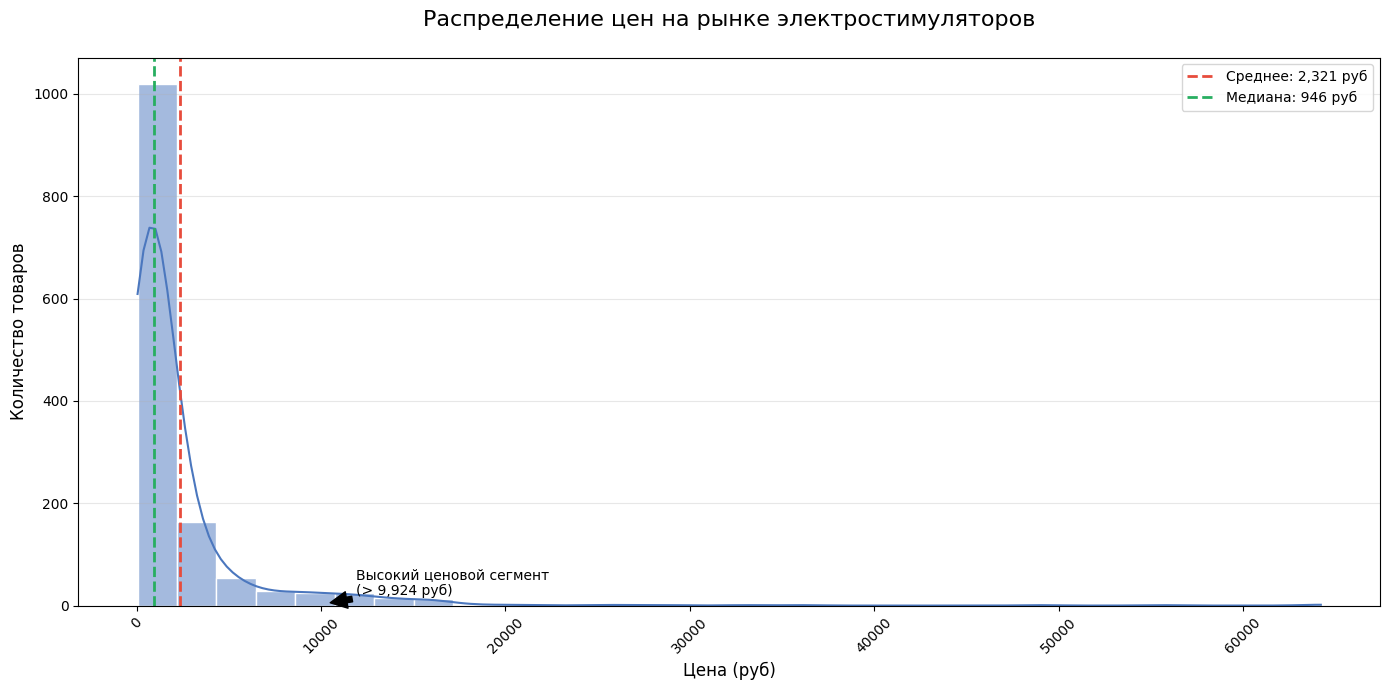

In [ ]:
price_data = Goods["price"]

plt.figure(figsize=(14, 7))

ax = sns.histplot(price_data, bins=30, kde=True, 
                 color='#4B77BE', edgecolor='white')

mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color="#E74C3C", linestyle='--', 
           linewidth=2, label=f'Среднее: {mean_price:,.0f} руб')
plt.axvline(median_price, color='#27AE60', linestyle='--',
           linewidth=2, label=f'Медиана: {median_price:,.0f} руб')

q95 = price_data.quantile(0.95)
outliers = price_data[price_data > q95]
if len(outliers) > 0:
    plt.annotate(f'Высокий ценовой сегмент\n(> {q95:,.0f} руб)',
                xy=(q95*1.05, 5), xytext=(q95*1.2, 20),
                arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Распределение цен на рынке электростимуляторов\n', fontsize=16)
plt.xlabel('Цена (руб)', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Основные метрики

In [ ]:
price_data = Goods['price'].copy()

stats = {
    'Средняя цена': f"{price_data.mean():,.0f} руб",
    'Медианная цена': f"{price_data.median():,.0f} руб",
    'Минимальная цена': f"{price_data.min():,.0f} руб",
    'Максимальная цена': f"{price_data.max():,.0f} руб",
    'Стандартное отклонение': f"{price_data.std():,.0f} руб",
    '95-й перцентиль': f"{price_data.quantile(0.95):,.0f} руб"
}

print("Ключевые метрики распределения цен:")
for k, v in stats.items():
    print(f"{k}: {v}")

Ключевые метрики распределения цен:
Средняя цена: 2,321 руб
Медианная цена: 946 руб
Минимальная цена: 46 руб
Максимальная цена: 64,226 руб
Стандартное отклонение: 4,625 руб
95-й перцентиль: 9,924 руб


In [ ]:
Goods[Goods['price'] == 46]

,id,marketplace,name,price,rating,feedbacks,brand,power_type,zones,type,description
782,399715975,wb,Подставка для микротокового массажера,46,5.0,96,unknown,not_specified,not_specified,not_specified,Микротоковый массажер для лица – это многофунк...


### Распределение цен без выбросов 

In [ ]:
print(float(Goods['price'].quantile(0.95)))
print(float(Goods['price'].quantile(0.01)))

9924.0
150.0


In [ ]:
print(Goods[Goods['price'] > Goods['price'].quantile(0.95)]['feedbacks'].describe())

count      68.000000
mean      213.970588
std       489.579959
min         8.000000
25%        21.500000
50%        57.000000
75%       211.500000
max      3207.000000
Name: feedbacks, dtype: float64


Можем заметить, что в данных есть явные выбросы. Например минимальная цена миостимулятора получилась 46 рублей, хотя на самом деле это аксессуар для миостимулятора. Также видим, что максимальная цена товара составляет 64226 рублей, это уже действительно миостимулятор профессионального уровня, однако товары такой ценовой категории не рассчитаны на массового потребителя, они узкоспециализированы и продаются штучно (судя по колличеству отзывов), это интересный кейс. Однако для понимания общей рыночной ситуации и поиска ниш имеет смысл отрезать эти товары, поскольку они либо не соотвествуют данной тематике, либо их продажи крайне малы. Для этого предлагается отрезать товары до 1-го перцентиля и после 95-го. Это позволит полноценно проанализировать данный рынок, сосредоточившись на более массовых продуктах.

In [ ]:
Goods = Goods[(Goods['price'] >= Goods['price'].quantile(0.01)) & (Goods['price'] <= Goods['price'].quantile(0.95))]

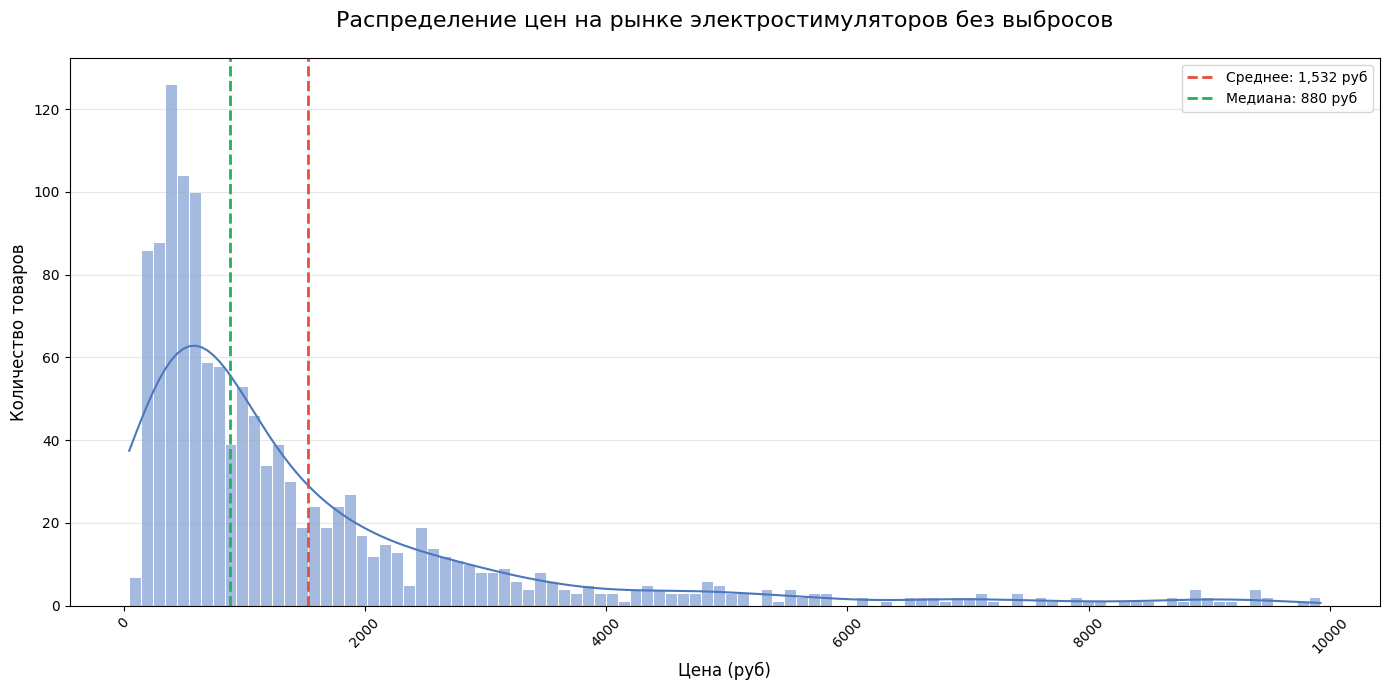

In [ ]:
price_data = Goods["price"]

plt.figure(figsize=(14, 7))
ax = sns.histplot(price_data, bins=100, kde=True,
                 color='#4B77BE', edgecolor='white')

mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color="#E74C3C", linestyle='--', 
           linewidth=2, label=f'Среднее: {mean_price:,.0f} руб')
plt.axvline(median_price, color='#27AE60', linestyle='--',
           linewidth=2, label=f'Медиана: {median_price:,.0f} руб')

plt.title('Распределение цен на рынке электростимуляторов без выбросов\n', fontsize=16)
plt.xlabel('Цена (руб)', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.show()

Большинство товаров стоят менее 5000 рублей

### Определение ценовых категорий

Попробуем разбить товары на ценовые категории по квартилям:

In [ ]:
print(Goods["price"].quantile(0.25), Goods["price"].quantile(0.5), Goods["price"].quantile(0.75))


456.0 880.0 1847.0


Однако наше распределение имеет слишком большой разброс, сильное смещение в сторону нулевой цены и длинный хвост. Поэтому для лучшего учета рыночных реалий, попробуем разбить нашу выборку на 4 ценовые категории (низкая, средняя, средне-высокая и высокая) с помощью метода KMeans 

In [ ]:
from sklearn.cluster import KMeans

# Goods = pd.read_csv(f'{CLEAR_DIRECTORY}{GOODS_FILE}')

price_segment_clear_df = Goods.copy()

prices = price_segment_clear_df["price"].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42).fit(prices)
price_segment_clear_df['price_segment'] = kmeans.labels_

In [ ]:
def min_max(price_segment, df):
    return int(df[df["price_segment"] == price_segment]["price"].min()), int(df[df["price_segment"] == price_segment]["price"].max())

min_max_segments = {}
for i in range(4):
    min_max_segments[i] = min_max(i, price_segment_clear_df)

min_max_segments = sorted(min_max_segments.items(), key=lambda item: item[1] )

print(f"Низкий ценовой сегмент: {min_max_segments[0][1]}")
print(f"Средний ценовой сегмент: {min_max_segments[1][1]}")
print(f"Средне-высокий ценовой сегмент:{min_max_segments[2][1]}")
print(f"Высокий ценовой сегмент:  {min_max_segments[3][1]}")

Низкий ценовой сегмент: (46, 1354)
Средний ценовой сегмент: (1359, 3221)
Средне-высокий ценовой сегмент:(3272, 6163)
Высокий ценовой сегмент:  (6300, 9922)


In [ ]:
price_segment_clear_df.head()

,id,marketplace,name,price,rating,feedbacks,brand,power_type,zones,type,description,price_segment
0,221329577,wb,Миостимулятор 36 программ антицеллюлитный для ...,2052,4.9,1021,unknown,usb; от аккумулятора,ноги; спина; тело,электроимпульсный; вибромассажер,Импульсный массажер – это высокотехнологичный ...,2
1,334678554,wb,Миостимулятор 48 программ массажер для похудения,4196,4.9,1021,unknown,от аккумулятора,тело,электроимпульсный,Четырехканальное обезболивание: 4-канальный ст...,3
2,221352035,wb,Миостимулятор 36 программ массажер для похудения,1847,4.9,1021,unknown,от аккумулятора,тело,электроимпульсный,Импульсный массажер – это высокотехнологичный ...,2
3,91028354,wb,Миостимулятор массажер импульсный электрически...,2543,4.6,561,ashop,220в (5а); 3 батарейки ааа; usb-шнур,ноги; пресс; тело,миостимулятор; массажер электрический; лечение,Миостимулятор импульсный массажер электрически...,2
4,169351017,wb,"Миостимулятор FZ-1 ""ШУБОШИ"" для мышц",3986,4.9,365,shuboshi,от аккумулятора; от сети,лицо / тело / руки / ноги / спина / живот / кожа,миостимулятор; массажер электрический импульсн...,"Миостимулятор SHUBOSHI FZ-1 ""ШУБОШИ"" или ""Удоб...",3


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

def get_segment_stats(segment_df, segment_name, top_n):
    stats = {
        'Сегмент': segment_name,
        'Кол-во товаров': len(segment_df),
        'Доля товаров без бренда': len(segment_df[segment_df['brand'].isna()]) / len(segment_df),
        'Средний рейтинг': segment_df['rating'].median()
    }
    
    # Топ брендов
    top_brands = segment_df['brand'].value_counts().head(top_n)
    stats.update({
        f'топ {top_n} брендов': '; '.join([f"{brand} ({count})" for (brand, count) in top_brands.items()])
    })
    
    # Топ зон
    zones = segment_df['zones'].str.split('[;,/]', expand=True).stack().str.strip()
    top_zones = zones.value_counts().head(top_n)
    stats.update({
        f'топ {top_n} зон': '; '.join([f"{zone} ({count})" for (zone, count) in top_zones.items()])
    })
    
    # Топ типов питания
    power_type = segment_df['power_type'].str.split('[;,/]', expand=True).stack().str.strip()
    top_power = power_type.value_counts().head(top_n)
    # stats.update({f'Топ тип питания {i+1}': f"{ptype} ({count})" for i, (ptype, count) in enumerate(top_power.items())})
    stats.update({
        f'топ {top_n} типов питания': '; '.join([f"{power} ({count})" for (power, count) in top_power.items()])
    })
    
    # Топ типов
    types = segment_df['type'].str.split('[;,/]', expand=True).stack().str.strip()
    top_types = types.value_counts().head(top_n)
    # stats.update({f'Топ тип {i+1}': f"{t} ({count})" for i, (t, count) in enumerate(top_types.items())})
    stats.update({
        f'топ {top_n} типов': '; '.join([f"{type} ({count})" for (type, count) in top_types.items()])
    })
    
    return stats


low_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[0][0]]
mid_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[1][0]]
mid_high_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[2][0]]
high_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[3][0]]
# Создаем DataFrame для каждого сегмента
segments = {
    'Низкий': low_price_df,
    'Средний': mid_price_df,
    'Средне-высокий': mid_high_price_df,
    'Высокий': high_price_df
}

top_n = 5
# Собираем статистику по всем сегментам
all_stats = [get_segment_stats(df, name, top_n) for name, df in segments.items()]

# Создаем итоговый DataFrame
result_df = pd.DataFrame(all_stats)

# Транспонируем DataFrame для лучшего отображения
# result_df = result_df.set_index('Сегмент').T 
display(result_df)
pd.reset_option('display.max_colwidth')

,Сегмент,Кол-во товаров,Доля товаров без бренда,Средний рейтинг,топ 5 брендов,топ 5 зон,топ 5 типов питания,топ 5 типов
0,Низкий,846,0.0,4.5,миостимуляторы (187); unknown (56); kebidu (15); yellow panda (13); rumir (13),тело (315); ноги (301); шея (243); спина (225); плечи (210),not_specified (232); usb (190); от аккумулятора (155); от порта usb (111); встроенный аккумулятор (109),электроимпульсный (231); миостимулирующий (220); not_specified (201); вибрационный (153); импульсный (148)
1,Средний,292,0.0,4.7,миостимуляторы (41); dimarket (18); unknown (17); planta (7); bodyrave (6),тело (134); ноги (97); шея (97); руки (76); спина (74),от аккумулятора (81); not_specified (59); usb (48); от сети (46); встроенный аккумулятор (43),электроимпульсный (79); миостимулирующий (78); импульсный (54); not_specified (53); вибрационный (49)
2,Средне-высокий,98,0.0,4.8,r&a baby (7); shuboshi (6); yamaguchi (5); yellow panda (4); миостимуляторы (4),тело (36); ноги (28); шея (22); ягодицы (21); спина (21),not_specified (28); от сети (24); встроенный аккумулятор (12); от аккумулятора (8); usb (7),not_specified (30); миостимулирующий (23); вибрационный (19); электроимпульсный (14); расслабляющий (13)
3,Высокий,49,0.0,4.8,keona (8); beurer (4); gezatone (3); yamaguchi (3); moman (3),ноги (24); тело (15); спина (11); шея (10); ягодицы (9),not_specified (13); от сети 220в (8); от сети (8); от аккумулятора (6); встроенный аккумулятор (5),миостимулирующий (14); вибрационный (10); not_specified (9); роликовый (8); импульсный (7)


In [ ]:
price_segment_clear_df[price_segment_clear_df['brand'] == "yamaguchi"].head(3)

,id,marketplace,name,price,rating,feedbacks,brand,power_type,zones,type,description,price_segment
17,44081627,wb,Миостимулятор для пресса тренажер ABS Trainer MIO,5012,4.7,1504,yamaguchi,5 в; от аккумулятора; без питания,пресс; живот; тело,электроимпульсный; вибрационный; миостимулятор,Миостимулятор для тела Yamaguchi ABS Trainer M...,3
36,44096937,wb,Миостимулятор для шеи и поясницы NECK Trainer MIO,4513,4.7,1504,yamaguchi,от аккумулятора; литиевая аккумуляторная батарея,плечи; спина; шея,электроимпульсный; вибрационный; миостимулятор,Yamaguchi Neck Trainer MIO – портативное устро...,3
53,258435392,wb,Миостимулятор для ног FOOT Trainer MIO,7946,4.7,1504,yamaguchi,not_specified,ноги; тело; бедра,электроимпульсный; вибрационный; миостимулятор,Yamaguchi FOOT Trainer MIO - портативное устро...,1


### Boxplot по брендам

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_82582/2391804607.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


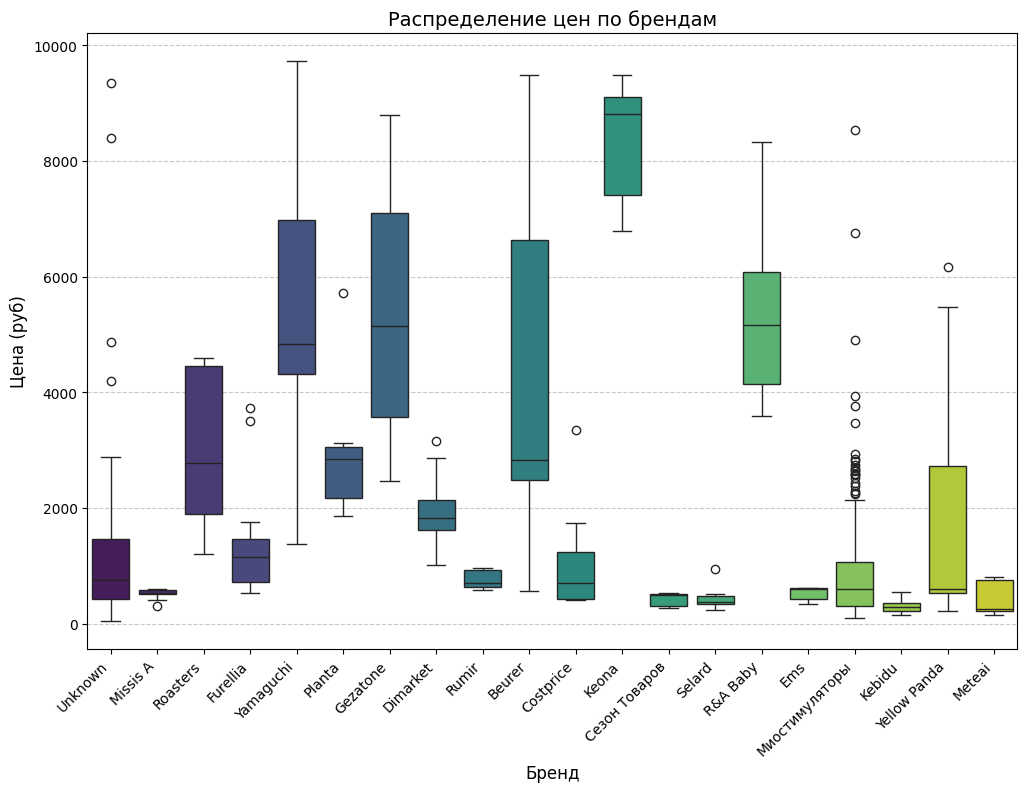

In [ ]:
# Boxplot по брендам

clear_df = Goods.copy()

boxplot_df = clear_df.dropna(subset=["brand"])
boxplot_df['brand'] = boxplot_df['brand'].str.strip().str.title()

top_brands = boxplot_df['brand'].value_counts().head(20).index  # Топ-20 брендов
df_filtered = boxplot_df[boxplot_df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_filtered,
    x='brand',
    y='price',
    palette='viridis'
)
plt.title('Распределение цен по брендам', fontsize=14)
plt.xlabel('Бренд', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Поворот подписей
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Анализ отзывов и рейтингов

### Зависимость цены от рейтинга 

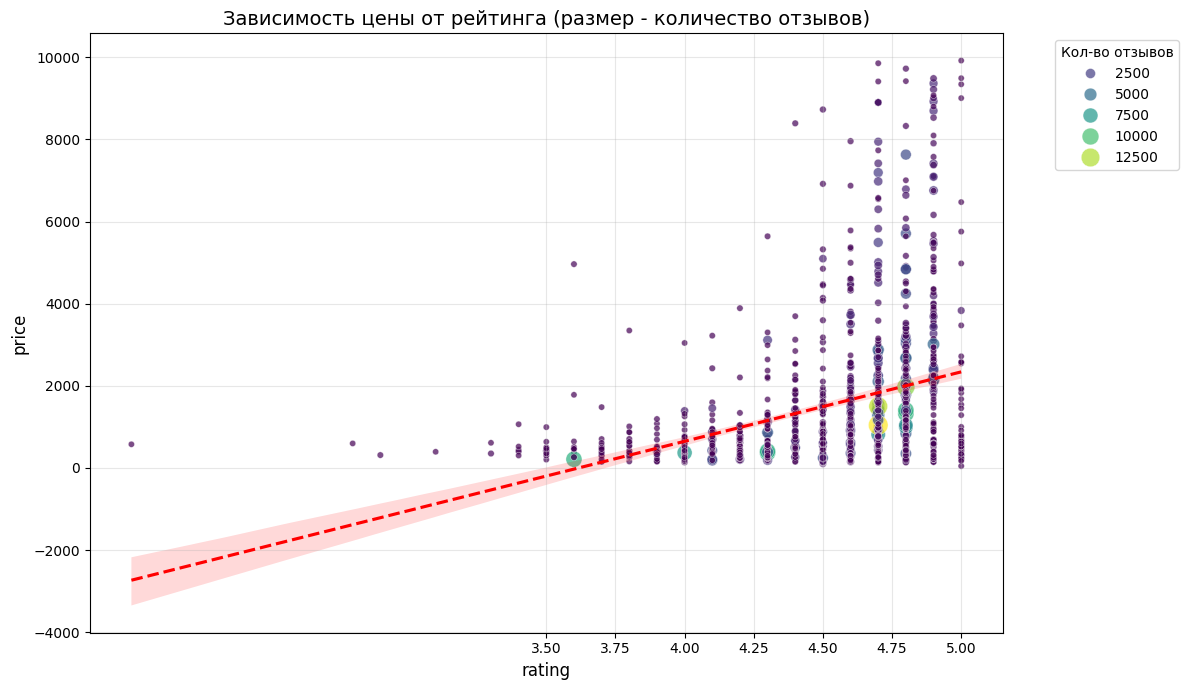

In [ ]:
# P.S. Обновить после подсчета отзывов по каждому конкретному товару

import numpy as np

plt.figure(figsize=(12, 7))
sns.scatterplot(data=Goods, x='rating', y='price', 
                hue='feedbacks', size='feedbacks',
                sizes=(20, 200), alpha=0.7, palette='viridis')

plt.title('Зависимость цены от рейтинга (размер - количество отзывов)', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)
plt.xticks(np.arange(3.5, 5.1, 0.25))
plt.grid(alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')

# Добавляем линию тренда
sns.regplot(data=Goods, x='rating', y='price', 
           scatter=False, color='red', line_kws={'linestyle':'--'})

plt.legend(title='Кол-во отзывов', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Электростимуляторы более дорогой ценовой категории получают рейтинг выше и пользуются большей популярностью

### Распределение цен в разных рейтинговых группах

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_82582/3436354131.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clear_df, x='rating_group', y='price',
/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_82582/3436354131.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = clear_df.groupby('rating_group')['price'].mean()


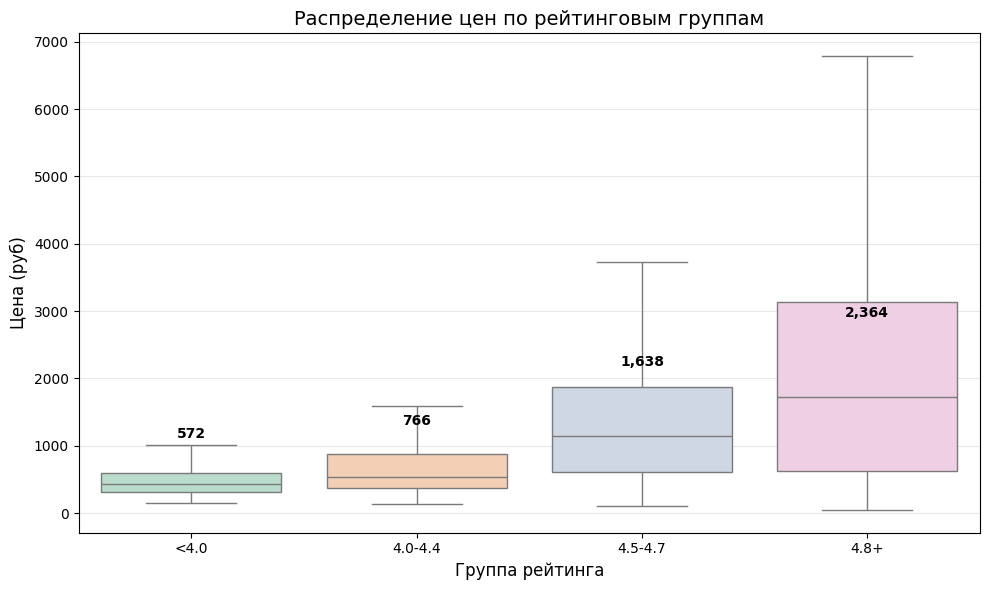

In [ ]:
plt.figure(figsize=(10, 6))

clear_df = Goods.copy()

# Создаем рейтинговые группы
clear_df['rating_group'] = pd.cut(clear_df['rating'], 
                                   bins=[0, 3.9, 4.4, 4.7, 5],
                                   labels=['<4.0', '4.0-4.4', '4.5-4.7', '4.8+'])

sns.boxplot(data=clear_df, x='rating_group', y='price', 
           palette='Pastel2', showfliers=False)

plt.title('Распределение цен по рейтинговым группам', fontsize=14)
plt.xlabel('Группа рейтинга', fontsize=12)
plt.ylabel('Цена (руб)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Добавляем средние значения
means = clear_df.groupby('rating_group')['price'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean+500, f'{mean:,.0f}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Выделение устройств с высоким рейтингом и большим количеством отзывов

In [ ]:
# Рассчитаем пороговые значения
high_rating_threshold = Goods['rating'].quantile(0.9)
high_feedback_threshold = Goods['feedbacks'].quantile(0.75)

print(f"Порог высокого рейтинга: {high_rating_threshold:.1f}")
print(f"Порог большого количества отзывов: {high_feedback_threshold:.0f}")

Порог высокого рейтинга: 4.9
Порог большого количества отзывов: 439


In [ ]:
popular_high_rated = Goods[
    (Goods['rating'] >= high_rating_threshold) & 
    (Goods['feedbacks'] >= high_feedback_threshold)
].sort_values(by=['rating', 'feedbacks'], ascending=[False, False])

# Добавляем расчет отношения рейтинга к цене
popular_high_rated['rating_price_ratio'] = popular_high_rated['rating'] / popular_high_rated['price']

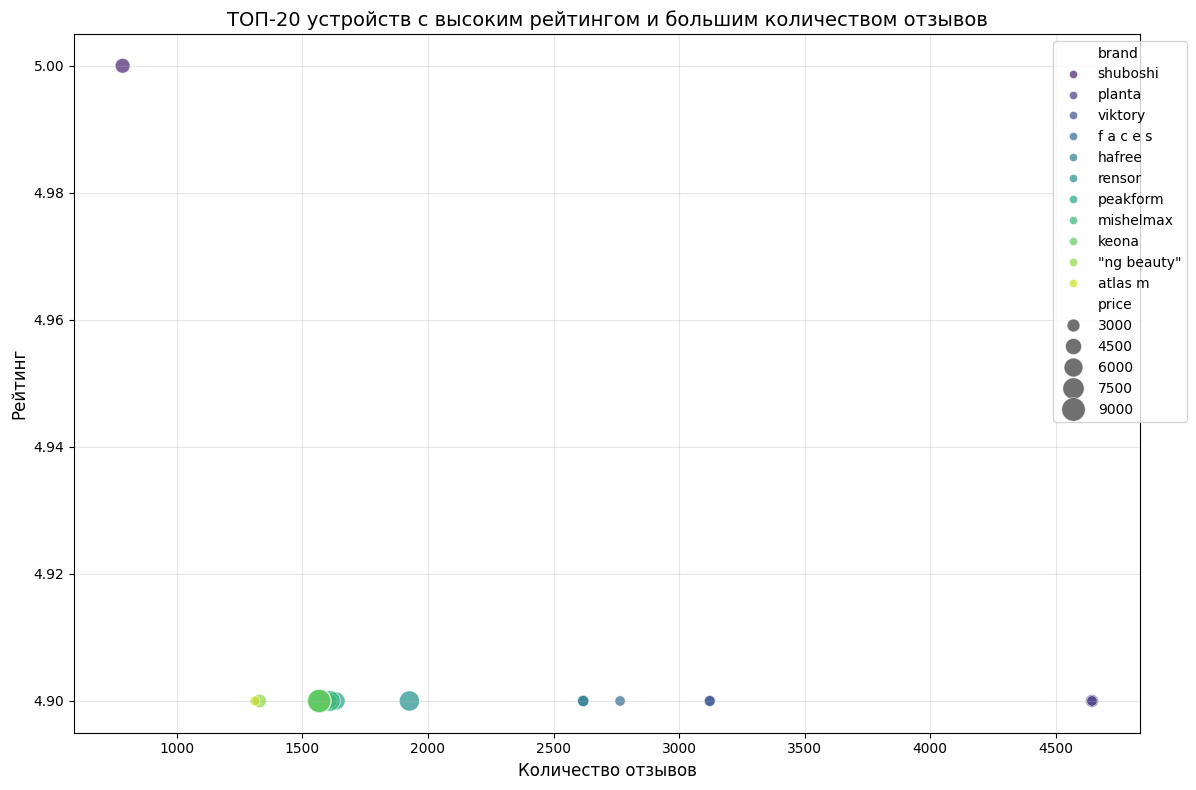

In [ ]:
plt.figure(figsize=(12, 8))
top_n = 20
sns.scatterplot(
    data=popular_high_rated.head(top_n),
    x='feedbacks',
    y='rating',
    size='price',
    hue='brand',
    sizes=(50, 300),
    palette='viridis',
    alpha=0.7
)

plt.title(f'ТОП-{top_n} устройств с высоким рейтингом и большим количеством отзывов', fontsize=14)
plt.xlabel('Количество отзывов', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
# plt.axhline(y=high_rating_threshold, color='red', linestyle='--', alpha=0.5)
# plt.axvline(x=high_feedback_threshold, color='red', linestyle='--', alpha=0.5)
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
results = [
    ['Топ-10 брендов', popular_high_rated['brand'].value_counts().head(10)],
    ['Типы питания', popular_high_rated['power_type'].value_counts().head(5)],
    ['Зоны применения', popular_high_rated['zones'].str.split('[;,/]', expand=True).stack().str.strip().value_counts().head(5)],
    ['Средняя цена', f"{popular_high_rated['price'].mean():,.0f} руб"]
]

def series_to_str(series, sep="; "):
    if isinstance(series, pd.Series):
        return sep.join(f"{k} ({v})" for k, v in series.items())
    return series

formatted_results = [
    [name, series_to_str(data)] 
    for name, data in results
]

results_df = pd.DataFrame(formatted_results, columns=['Аналитический показатель', 'Результат'])

pd.set_option('display.max_colwidth', None)
display(results_df)
pd.reset_option('display.max_colwidth')

,Аналитический показатель,Результат
0,Топ-10 брендов,keona (7); mishelmax (4); unknown (4); миостимуляторы (3); shuboshi (2); viktory (2); hafree (2); peakform (2); planta (2); drevmass (1)
1,Типы питания,от сети 220в (7); not_specified (3); от аккумулятора (3); от сети (3); встроенный аккумулятор (2)
2,Зоны применения,ноги (22); тело (19); руки (15); поясница (12); ягодицы (12)
3,Средняя цена,"4,587 руб"


In [ ]:
# Нормализация данных
popular_high_rated['norm_rating'] = (popular_high_rated['rating'] - Goods['rating'].min()) / (Goods['rating'].max() - Goods['rating'].min())
popular_high_rated['norm_feedbacks'] = (popular_high_rated['feedbacks'] - Goods['feedbacks'].min()) / (Goods['feedbacks'].max() - Goods['feedbacks'].min())

# Расчет индекса (можно менять весовые коэффициенты)
popular_high_rated['popularity_index'] = 0.7 * popular_high_rated['norm_rating'] + 0.3 * popular_high_rated['norm_feedbacks']

# ТОП-10 по индексу популярности
top_popular = popular_high_rated.sort_values('popularity_index', ascending=False).head(10)[
    ['name', 'brand', 'price', 'rating', 'feedbacks', 'popularity_index']
]
top_popular

,name,brand,price,rating,feedbacks,popularity_index
871,Массажер для тела миостимулятор тренажер мышц ...,planta,3013,4.9,4644,0.774959
889,Миостимулятор массажер для тела PLANTA EMS-200...,planta,2146,4.9,4644,0.774959
865,"Миостимулятор для мышц тела с подогревом, мини...",viktory,2397,4.9,3122,0.742738
926,"Миостимулятор для мышц с подогревом белый, мин...",viktory,2211,4.9,3122,0.742738
127,Микротоковый массажер для лица и тела,f a c e s,2092,4.9,2765,0.735181
867,"HAFREE Миостимулятор для мышц тела , тренажер ...",hafree,2439,4.9,2618,0.732069
897,Миостимулятор для пресса HAFREE ; тренажер для...,hafree,2395,4.9,2618,0.732069
1123,Миостимулятор для тела / Тренажер для пресса /...,rensor,6758,4.9,1926,0.717419
872,"SHUBOSHI Миостимулятор FZ-1 ""ШУБОШИ"" или ""Удоб...",shuboshi,3834,5.0,784,0.716576
115,Виброплатформа для похудения тренажер,peakform,5465,4.9,1634,0.711237


### Анализ текстов отзывов

#### Подготовка текстов

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nekitmilk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Загрузка данных
df = Feedbacks

In [ ]:
# Функция очистки текста
def clean_text(text):
    if pd.isna(text): 
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Удаление пунктуации
    text = re.sub(r'\d+', '', text)       # Удаление цифр
    # Удаление стоп-слов и стемминг
    stop_words = set(stopwords.words('russian'))
    stemmer = SnowballStemmer('russian')
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    return " ".join(words)


df['advantage'] = df['advantage'].str.replace(r'^Достоинства:\s*', '', regex=True)
df['disadvantage'] = df['disadvantage'].str.replace(r'^Недостатки:\s*', '', regex=True)
df['comment'] = df['comment'].str.replace(r'^Комментарий:\s*', '', regex=True)
df['full_text'] = (
    df['advantage'].fillna('') + " " + 
    df['disadvantage'].fillna('') + " " +
    df['comment'].fillna('')
)

# Очистка колонок
df['advantage_clean'] = df['advantage'].apply(clean_text)
df['disadvantage_clean'] = df['disadvantage'].apply(clean_text)
df['comment_clean'] = df['comment'].apply(clean_text)

df['full_text_clean'] = df['full_text'].apply(clean_text)

In [ ]:
df.head(5)

,product_id,marketplace,rating,advantage,disadvantage,comment,full_text,advantage_clean,disadvantage_clean,comment_clean,full_text_clean
0,1099137205,ozon,5,,,Я осталась в восторге от миостимулятора Dykema...,Я осталась в восторге от миостимулятора Dyke...,,,оста восторг миостимулятор dykemann intension ...,оста восторг миостимулятор dykemann intension ...
1,1099137205,ozon,5,,,Классный прибор! Я его использовала после трав...,Классный прибор! Я его использовала после тр...,,,классн прибор использова травм домашн услов оч...,классн прибор использова травм домашн услов оч...
2,1099137205,ozon,5,,,работает.,работает.,,,работа,работа
3,1099137205,ozon,5,,,"Свой функционал выполняет, пока в процессе его...","Свой функционал выполняет, пока в процессе е...",,,сво функциона выполня пок процесс грамотн испо...,сво функциона выполня пок процесс грамотн испо...
4,1099137205,ozon,5,,,"Качественный товар. Боли в мышцах снял, нескол...","Качественный товар. Боли в мышцах снял, неск...",,,качествен товар бол мышц снял нескольк режим о...,качествен товар бол мышц снял нескольк режим о...


In [ ]:
positive = df[df['rating'] > 3]  # Положительные отзывы
negative = df[df['rating'] <= 3]  # Негативные отзывы

#### WordCloud

In [ ]:
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        max_words=50
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

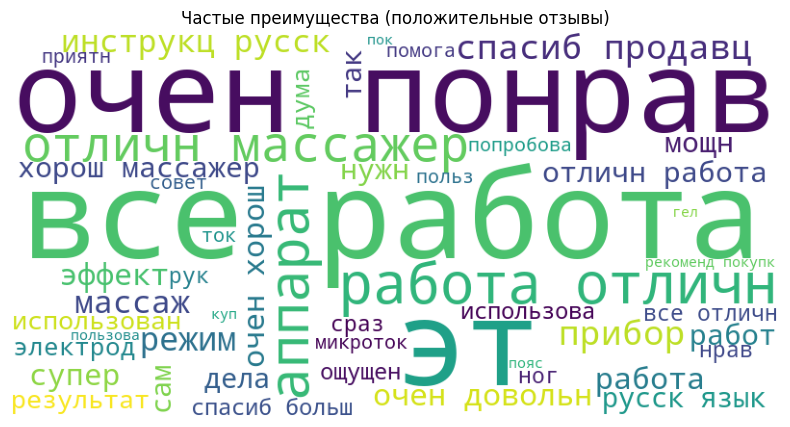

In [ ]:
# Для положительных отзывов (преимущества)
all_positive = " ".join(positive['full_text_clean'])
generate_wordcloud(all_positive, 'Частые преимущества (положительные отзывы)')

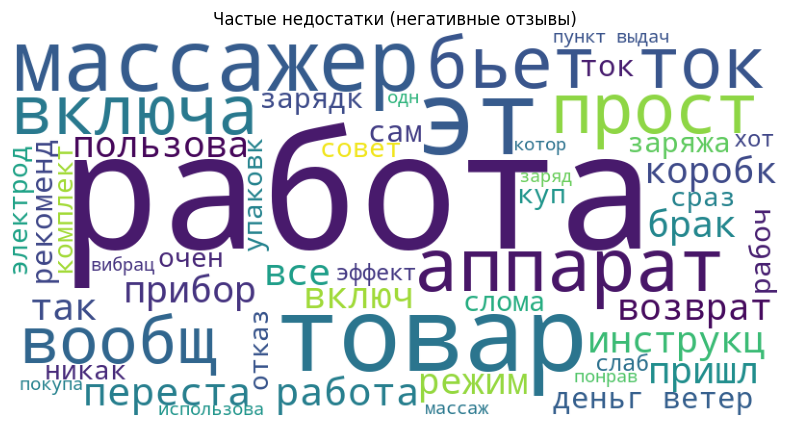

In [ ]:
# Для негативных отзывов (недостатки)
all_negative = " ".join(negative['full_text_clean'])
generate_wordcloud(all_negative, 'Частые недостатки (негативные отзывы)')

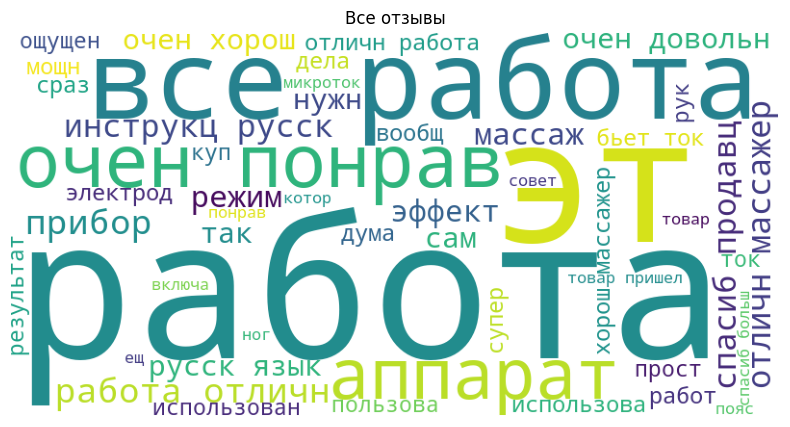

In [ ]:
# Все отзывы

all_feedbacks = " ".join(df['full_text_clean'])
generate_wordcloud(all_feedbacks, 'Все отзывы')

#### TF-IDF

In [ ]:
def get_tfidf_top_features(texts, n=10, use_idf=False, use_mean=True):
    tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2))

    tfidf_matrix = tfidf.fit_transform(texts)
    feature_names = tfidf.get_feature_names_out()
    
    if use_idf:
        sorted_indices = tfidf.idf_.argsort()
        return feature_names[sorted_indices][:n].tolist()
    
    if use_mean:
        aggregated = tfidf_matrix.mean(axis=0).A1
    else:
        aggregated = tfidf_matrix.sum(axis=0).A1
    
    sorted_indices = aggregated.argsort()[::-1]  # Сортировка по убыванию
    return feature_names[sorted_indices][:n].tolist()

In [ ]:
# Ключевые слова в преимуществах положительных отзывов
top_positive_adv = get_tfidf_top_features(positive['full_text_clean'])
print("Топ-10 слов (положительные отзывы, преимущества):", " ".join(top_positive_adv))

print("Топ-10 слов (положительные отзывы, преимущества):", top_positive_adv)

Топ-10 слов (положительные отзывы, преимущества): работа отличн очен массажер хорош все спасиб рекоменд понрав супер
Топ-10 слов (положительные отзывы, преимущества): ['работа', 'отличн', 'очен', 'массажер', 'хорош', 'все', 'спасиб', 'рекоменд', 'понрав', 'супер']


In [ ]:
# Ключевые слова в недостатках негативных отзывов
top_negative_dis = get_tfidf_top_features(negative['full_text_clean'], n=50)
print("Топ-20 слов (негативные отзывы, недостатки):", " ".join(top_negative_dis))
print("Топ-20 слов (негативные отзывы, недостатки):", top_negative_dis)

Топ-20 слов (негативные отзывы, недостатки): работа очен ток товар пришел массажер возврат деньг бьет эт вообщ одн слаб инструкц слома коробк полн переста зарядк включа прост пришл аппарат плох брак заряжа рабоч сильн использован бьет ток упаковк все никак ден так перв эффект режим включ быстр рекоменд пульт пользова совет переста работа минут сам месяц прибор втор
Топ-20 слов (негативные отзывы, недостатки): ['работа', 'очен', 'ток', 'товар', 'пришел', 'массажер', 'возврат', 'деньг', 'бьет', 'эт', 'вообщ', 'одн', 'слаб', 'инструкц', 'слома', 'коробк', 'полн', 'переста', 'зарядк', 'включа', 'прост', 'пришл', 'аппарат', 'плох', 'брак', 'заряжа', 'рабоч', 'сильн', 'использован', 'бьет ток', 'упаковк', 'все', 'никак', 'ден', 'так', 'перв', 'эффект', 'режим', 'включ', 'быстр', 'рекоменд', 'пульт', 'пользова', 'совет', 'переста работа', 'минут', 'сам', 'месяц', 'прибор', 'втор']


На сколько разумно прибавлять частицу "не" для списка терминов из негативных отзывов?

In [ ]:
# Для положительных отзывов
positive_descriptions = positive['advantage_clean'] + " " + positive['comment_clean']
negative_descriptions = negative['disadvantage_clean'] + " " + negative['comment_clean']

# Топ-термины
top_positive_terms = get_tfidf_top_features(positive_descriptions, n=30)
top_negative_terms = get_tfidf_top_features(negative_descriptions, n=30)

print("Топ положительных тем:", top_positive_terms)
print("Топ негативных тем:", top_negative_terms)

Топ положительных тем: ['работа', 'отличн', 'очен', 'массажер', 'хорош', 'все', 'спасиб', 'рекоменд', 'понрав', 'супер', 'аппарат', 'классн', 'товар', 'режим', 'пок', 'результат', 'подарок', 'довольн', 'пришел', 'прост', 'вещ', 'эт', 'упакова', 'эффект', 'штук', 'мышц', 'быстр', 'удобн', 'ток', 'массаж']
Топ негативных тем: ['работа', 'очен', 'товар', 'ток', 'пришел', 'возврат', 'массажер', 'деньг', 'эт', 'бьет', 'вообщ', 'инструкц', 'одн', 'слаб', 'слома', 'коробк', 'переста', 'полн', 'зарядк', 'включа', 'прост', 'заряжа', 'брак', 'пришл', 'аппарат', 'плох', 'сильн', 'рабоч', 'использован', 'бьет ток']


In [ ]:
uniq_positive_terms = get_tfidf_top_features(positive['full_text_clean'], use_idf=True)
uniq_negative_terms = get_tfidf_top_features(negative['full_text_clean'], use_idf=True)

print("Уникальные термины для положительных отзывов:", uniq_positive_terms)
print("Уникальные термины для негативных отзывов:", uniq_negative_terms)

Уникальные термины для положительных отзывов: ['работа', 'очен', 'отличн', 'массажер', 'спасиб', 'хорош', 'рекоменд', 'все', 'понрав', 'аппарат']
Уникальные термины для негативных отзывов: ['работа', 'очен', 'товар', 'ток', 'пришел', 'возврат', 'деньг', 'массажер', 'эт', 'бьет']


#### Поиск отзывов, которые содержат ключевые слова

In [ ]:
def search_term(df, search, column="full_text_clean"):
    return df[df[column].str.contains(search)]

def output_n_feedbacks(df, n):
    feedback_texts = []
    for i in df['full_text'].head(n):
        feedback_texts.append(str(i))
    return feedback_texts


count_output = 50
search = "работа"
texts = output_n_feedbacks(search_term(negative, search), count_output)

for text in texts:
    print(f"{text.strip()}\n")

Напишу наверное единственный настоящий отзыв😂 В общем полностью протестировал несколько аппаратов в том числе и этот самый дорогой. Абсолютно не стоит своих денег! Использовал на всех членах семьи, бесполезная вещь. Здоровья никому не улучшил 😂 Кроме панических атак ничего у нас не вызвал. Очень жаль тех людей, кто заказал. Электроды работают через раз, о сокращениях мышц не может быть и речи. Просто бьет током немного и всё, после эффекта нет, расслабления нет. Пустышка. Не тратьте даже свое время! 🥲 Надеюсь мой отзыв хоть кому-то сэкономит время. Намного ценнее будет свечку в церкви поставить Чудотворцу! И то пользы больше будет. 🛐

Брал в подарок, но с таким товарным видом, только в хлам. Коробка замызгана и перемотана скотчем, сам аппарат вне упаковки, порванный пакет, засунут (для комплектации видать) в основную коробку. Сам аппарат, такое впечатление что отработал он у кого то значительное время, а потом его тупо спихнули. Да и по электродам видно что уже пользовались. Проверил в

## Анализ характерстик

### Частотный анализ характеристик

#### Тип питания

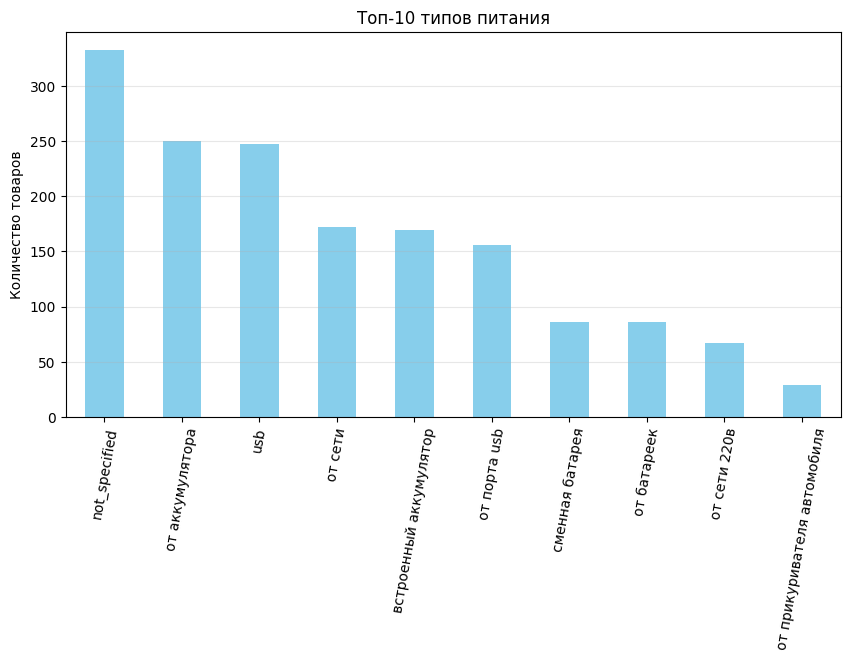

In [ ]:
# Разделим значения, так как в ячейке может быть несколько типов через ";"
power_types = Goods['power_type'].str.split('[;,/]', expand=True).stack().str.strip()

plt.figure(figsize=(10, 5))
power_types.value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Топ-10 типов питания')
plt.ylabel('Количество товаров')
plt.xticks(rotation=80)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### Зоны применения

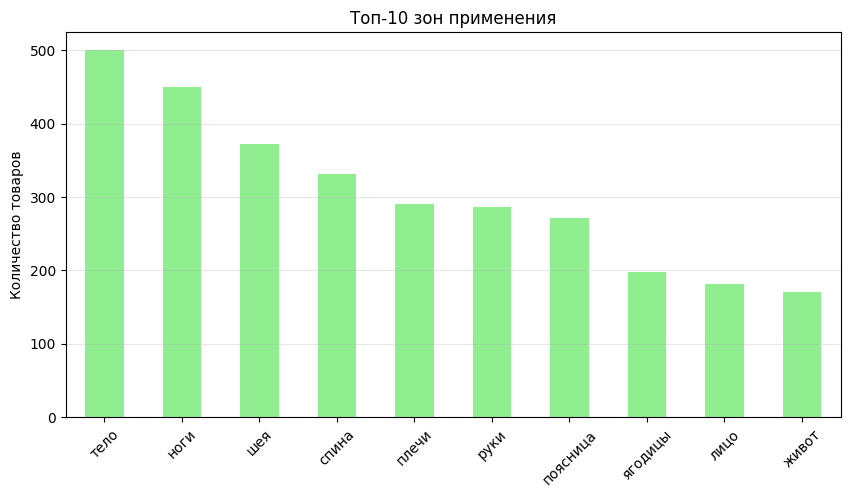

In [ ]:
zones = Goods['zones'].str.split('[;,/]', expand=True).stack().str.strip()

plt.figure(figsize=(10, 5))
zones.value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Топ-10 зон применения')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### Тип устройства

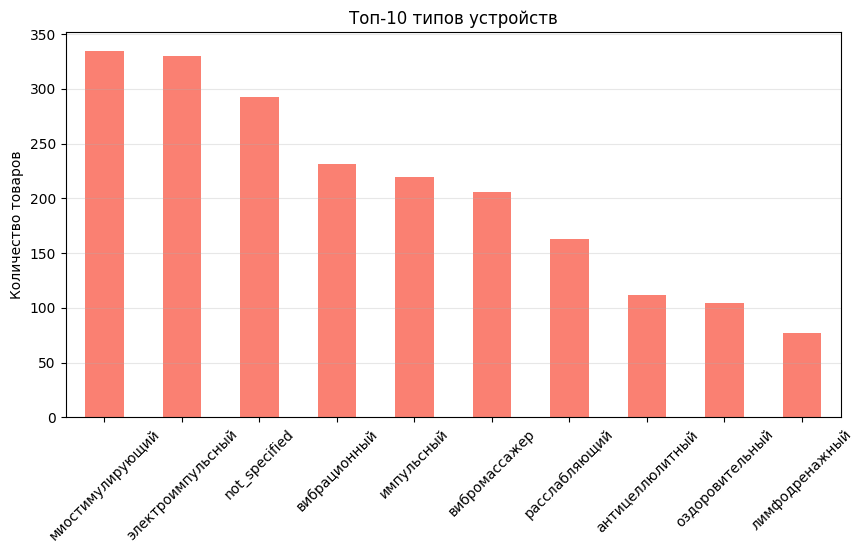

In [ ]:
types = Goods['type'].str.split('[;,/]', expand=True).stack().str.strip()

plt.figure(figsize=(10, 5))
types.value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Топ-10 типов устройств')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Корреляция характеристик с ценой и рейтингом

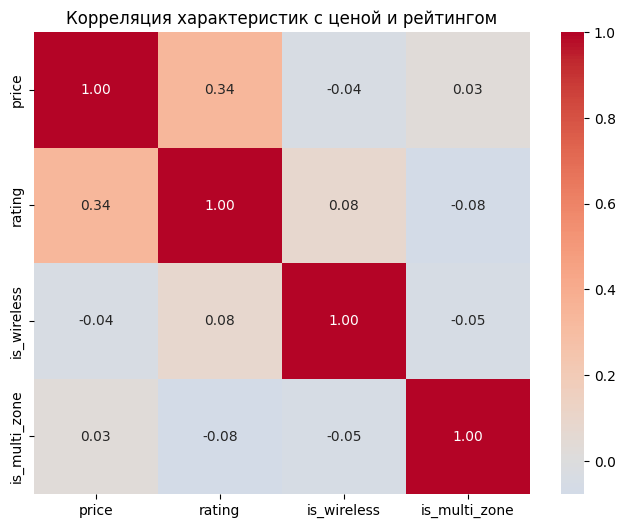

In [70]:
# Создаем копию данных
df = Goods.copy()

# Заполняем пропуски в текстовых полях пустыми строками перед анализом
# df['power_type'] = df['power_type'].fillna('')
# df['zones'] = df['zones'].fillna('')
# df['type'] = df['type'].fillna('')

# Создаем бинарные признаки с обработкой пропусков
df['is_wireless'] = df['power_type'].str.contains('аккумулятор|батарея|USB', regex=True, na=False).astype(int)
df['is_multi_zone'] = (df['zones'].str.count(';') > 1).fillna(0).astype(int)


# Удаляем строки с пропусками в числовых полях для корреляции
df_clean = df.dropna(subset=['price', 'rating'])

# Анализ корреляции
corr_matrix = df_clean[['price', 'rating', 'is_wireless', 'is_multi_zone']].corr()

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Корреляция характеристик с ценой и рейтингом')
plt.show()

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_82582/2914886851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_wireless', y='price', palette='pastel')


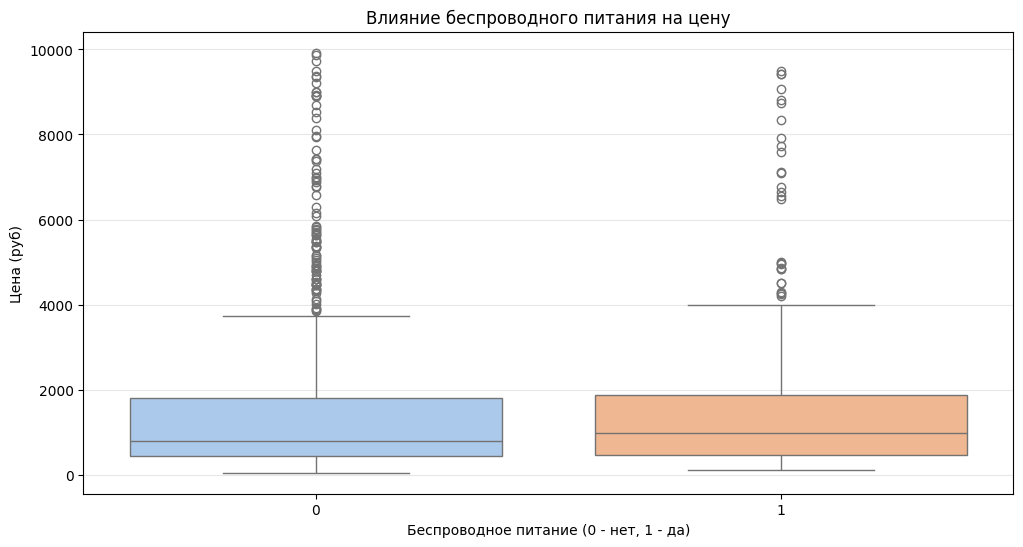

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_wireless', y='price', palette='pastel')
plt.title('Влияние беспроводного питания на цену')
plt.xlabel('Беспроводное питание (0 - нет, 1 - да)')
plt.ylabel('Цена (руб)')
plt.grid(axis='y', alpha=0.3)
plt.show()

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_82582/2585468428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_multi_zone', y='rating', palette='Set2')


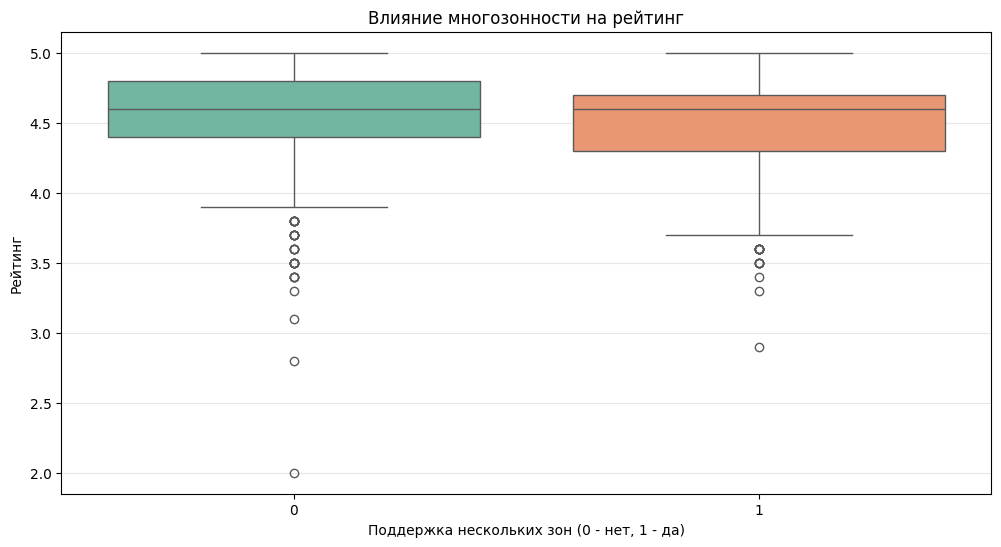

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_multi_zone', y='rating', palette='Set2')
plt.title('Влияние многозонности на рейтинг')
plt.xlabel('Поддержка нескольких зон (0 - нет, 1 - да)')
plt.ylabel('Рейтинг')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Тестыыыы